In this project, you will build a neural network model that can segment markets based on demographics, behavior, and other relevant factors. You will start by exploring a dataset of customer data, such as the Online Retail Dataset or the Bank Marketing Dataset, and performing EDA to gain insights into the data. You will analyze the correlation between different features and identify any outliers or missing values that need to be handled. Datasets:- Bank Marketing Data: https://www.kaggle.com/datasets/henriqueyamahata/bank-marketing Online Retail Data: https://www.kaggle.com/datasets/carrie1/ecommerce-data

In [784]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import keras
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import torch 
from torch import nn
import warnings

In [785]:
data=pd.read_csv('bank-additional-full.csv',sep=';')
data.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [786]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [787]:
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [788]:
data.describe().transpose()

count         mean         std       min       25%  \
age             41188.0    40.024060   10.421250    17.000    32.000   
duration        41188.0   258.285010  259.279249     0.000   102.000   
campaign        41188.0     2.567593    2.770014     1.000     1.000   
pdays           41188.0   962.475454  186.910907     0.000   999.000   
previous        41188.0     0.172963    0.494901     0.000     0.000   
emp.var.rate    41188.0     0.081886    1.570960    -3.400    -1.800   
cons.price.idx  41188.0    93.575664    0.578840    92.201    93.075   
cons.conf.idx   41188.0   -40.502600    4.628198   -50.800   -42.700   
euribor3m       41188.0     3.621291    1.734447     0.634     1.344   
nr.employed     41188.0  5167.035911   72.251528  4963.600  5099.100   

                     50%       75%       max  
age               38.000    47.000    98.000  
duration         180.000   319.000  4918.000  
campaign           2.000     3.000    56.000  
pdays            999.000   999.000   999.000  
previous           0.000     0.000     7.000  
emp.var.rate       1.100     1.400     1.400  
cons.price.idx    93.749    93.994    94.767  
cons.conf.idx    -41.800   -36.400   -26.900  
euribor3m          4.857     4.961     5.045  
nr.employed     5191.000  5228.100  5228.100

In [789]:
data.describe(include='object').transpose()

count unique                top   freq
job          41188     12             admin.  10422
marital      41188      4            married  24928
education    41188      8  university.degree  12168
default      41188      3                 no  32588
housing      41188      3                yes  21576
loan         41188      3                 no  33950
contact      41188      2           cellular  26144
month        41188     10                may  13769
day_of_week  41188      5                thu   8623
poutcome     41188      3        nonexistent  35563
y            41188      2                 no  36548

In [790]:
data.shape

(41188, 21)

In [791]:
data.duplicated?

Signature:
data.duplicated(
    subset: 'Hashable | Sequence[Hashable] | None' = None,
    keep: "Literal['first'] | Literal['last'] | Literal[False]" = 'first',
) -> 'Series'
Docstring:
Return boolean Series denoting duplicate rows.

Considering certain columns is optional.

Parameters
----------
subset : column label or sequence of labels, optional
    Only consider certain columns for identifying duplicates, by
    default use all of the columns.
keep : {'first', 'last', False}, default 'first'
    Determines which duplicates (if any) to mark.

    - ``first`` : Mark duplicates as ``True`` except for the first occurrence.
    - ``last`` : Mark duplicates as ``True`` except for the last occurrence.
    - False : Mark all duplicates as ``True``.

Returns
-------
Series
    Boolean series for each duplicated rows.

See Also
--------
Index.duplicated : Equivalent method on index.
Series.duplicated : Equivalent method on Series.
Series.drop_duplicates : Remove duplicate values from Serie

In [792]:
data[data.duplicated(keep=False)]

age          job   marital            education  default housing loan  \
1265    39  blue-collar   married             basic.6y       no      no   no   
1266    39  blue-collar   married             basic.6y       no      no   no   
12260   36      retired   married              unknown       no      no   no   
12261   36      retired   married              unknown       no      no   no   
14155   27   technician    single  professional.course       no      no   no   
14234   27   technician    single  professional.course       no      no   no   
16819   47   technician  divorced          high.school       no     yes   no   
16956   47   technician  divorced          high.school       no     yes   no   
18464   32   technician    single  professional.course       no     yes   no   
18465   32   technician    single  professional.course       no     yes   no   
20072   55     services   married          high.school  unknown      no   no   
20216   55     services   married          high.school  unknown      no   no   
20531   41   technician   married  professional.course       no     yes   no   
20534   41   technician   married  professional.course       no     yes   no   
25183   39       admin.   married    university.degree       no      no   no   
25217   39       admin.   married    university.degree       no      no   no   
28476   24     services    single          high.school       no     yes   no   
28477   24     services    single          high.school       no     yes   no   
32505   35       admin.   married    university.degree       no     yes   no   
32516   35       admin.   married    university.degree       no     yes   no   
36950   45       admin.   married    university.degree       no      no   no   
36951   45       admin.   married    university.degree       no      no   no   
38255   71      retired    single    university.degree       no      no   no   
38281   71      retired    single    university.degree       no      no   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
1265   telephone   may         thu  ...         1    999         0   
1266   telephone   may         thu  ...         1    999         0   
12260  telephone   jul         thu  ...         1    999         0   
12261  telephone   jul         thu  ...         1    999         0   
14155   cellular   jul         mon  ...         2    999         0   
14234   cellular   jul         mon  ...         2    999         0   
16819   cellular   jul         thu  ...         3    999         0   
16956   cellular   jul         thu  ...         3    999         0   
18464   cellular   jul         thu  ...         1    999         0   
18465   cellular   jul         thu  ...         1    999         0   
20072   cellular   aug         mon  ...         1    999         0   
20216   cellular   aug         mon  ...         1    999         0   
20531   cellular   aug         tue  ...         1    999         0   
20534   cellular   aug         tue  ...         1    999         0   
25183   cellular   nov         tue  ...         2    999         0   
25217   cellular   nov         tue  ...         2    999         0   
28476   cellular   apr         tue  ...         1    999         0   
28477   cellular   apr         tue  ...         1    999         0   
32505   cellular   may         fri  ...         4    999         0   
32516   cellular   may         fri  ...         4    999         0   
36950   cellular   jul         thu  ...         1    999         0   
36951   cellular   jul         thu  ...         1    999         0   
38255  telephone   oct         tue  ...         1    999         0   
38281  telephone   oct         tue  ...         1    999         0   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
1265   nonexistent          1.1          93.994          -36.4      4.855   
1266   nonexistent          1.1          93.994          -36.4      4.855   
12260  nonexistent      

In [793]:
data.drop_duplicates(inplace=True)
data[data.duplicated(keep=False)]

Empty DataFrame
Columns: [age, job, marital, education, default, housing, loan, contact, month, day_of_week, duration, campaign, pdays, previous, poutcome, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed, y]
Index: []

[0 rows x 21 columns]

In [794]:
data.shape

(41176, 21)

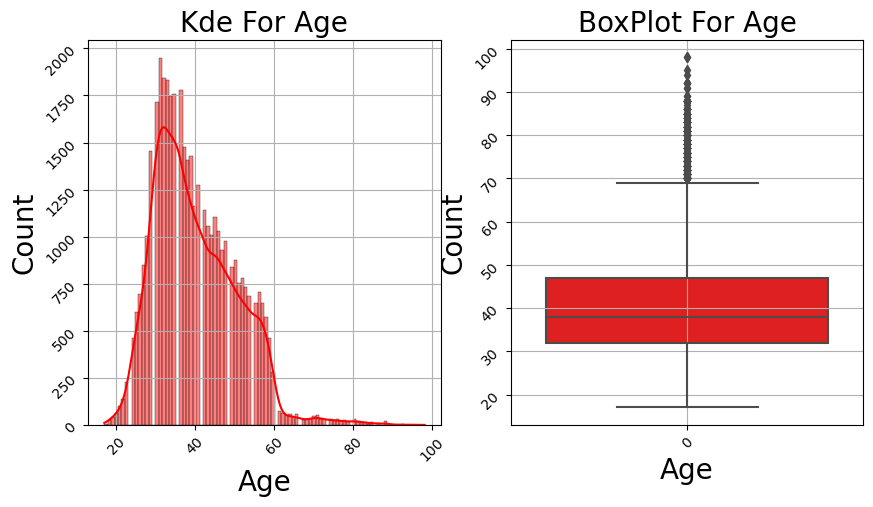

In [795]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(data.age,kde=True,color='r')
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Kde For Age',fontsize=20)
plt.xlabel('Age',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.subplot(1,2,2)
sns.boxplot(data=data.age,color='r')
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('BoxPlot For Age',fontsize=20)
plt.xlabel('Age',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()

In [796]:
q25,q75=np.percentile(data.age,(25,75))
qr=q75-q25
max=q75+qr*1.5
min=q25-qr*1.5
data.age[data.age>max]=max
data.age[data.age<min]=min
q25,q75,qr,max,min

(32.0, 47.0, 15.0, 69.5, 9.5)

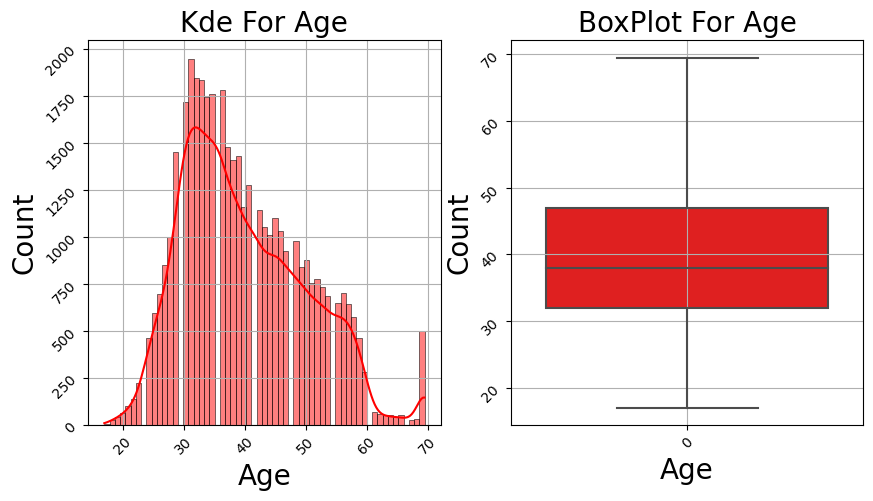

In [797]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(data.age,kde=True,color='r')
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Kde For Age',fontsize=20)
plt.xlabel('Age',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.subplot(1,2,2)
sns.boxplot(data=data.age,color='r')
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('BoxPlot For Age',fontsize=20)
plt.xlabel('Age',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()

In [798]:
data.job.value_counts()

admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

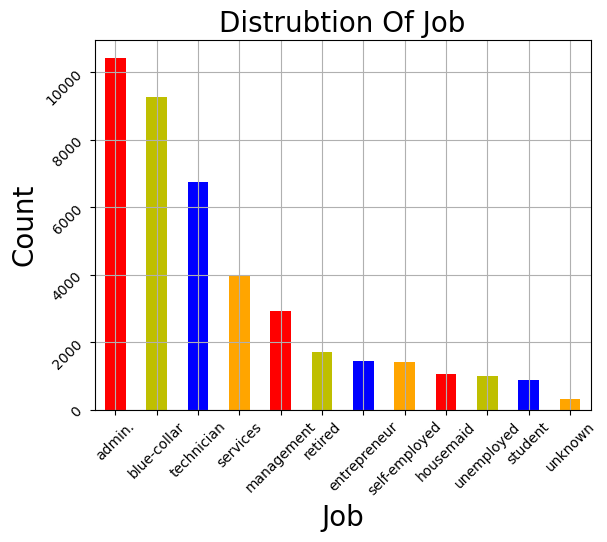

In [799]:
data.job.value_counts().plot.bar(color=['r','y','b','orange'])
plt.grid(True)
plt.title('Distrubtion Of Job',fontsize=20)
plt.xlabel('Job',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [800]:
pd.crosstab(data.y,data.job)

job  admin.  blue-collar  entrepreneur  housemaid  management  retired  \
y                                                                        
no     9068         8615          1332        954        2596     1284   
yes    1351          638           124        106         328      434   

job  self-employed  services  student  technician  unemployed  unknown  
y                                                                       
no            1272      3644      600        6009         870      293  
yes            149       323      275         730         144       37

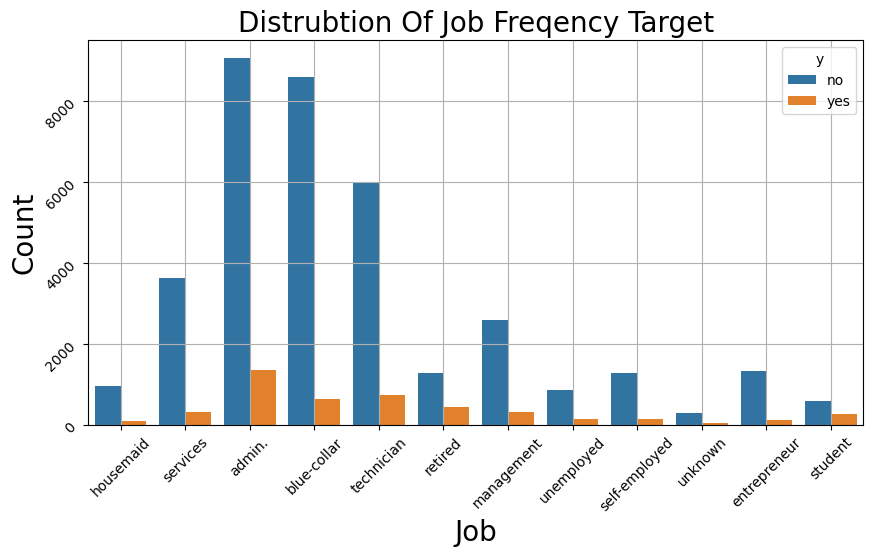

In [801]:
plt.figure(figsize=(10,5))
sns.countplot(x='job',hue='y',data=data)
plt.grid(True)
plt.title('Distrubtion Of Job Freqency Target',fontsize=20)
plt.xlabel('Job',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [802]:
pd.crosstab(data.loan,data.job)

job      admin.  blue-collar  entrepreneur  housemaid  management  retired  \
loan                                                                         
no         8482         7647          1214        877        2414     1434   
unknown     227          240            36         29          71       44   
yes        1710         1366           206        154         439      240   

job      self-employed  services  student  technician  unemployed  unknown  
loan                                                                        
no                1186      3265      710        5603         838      268  
unknown             40       101       23         147          27        5  
yes                195       601      142         989         149       57

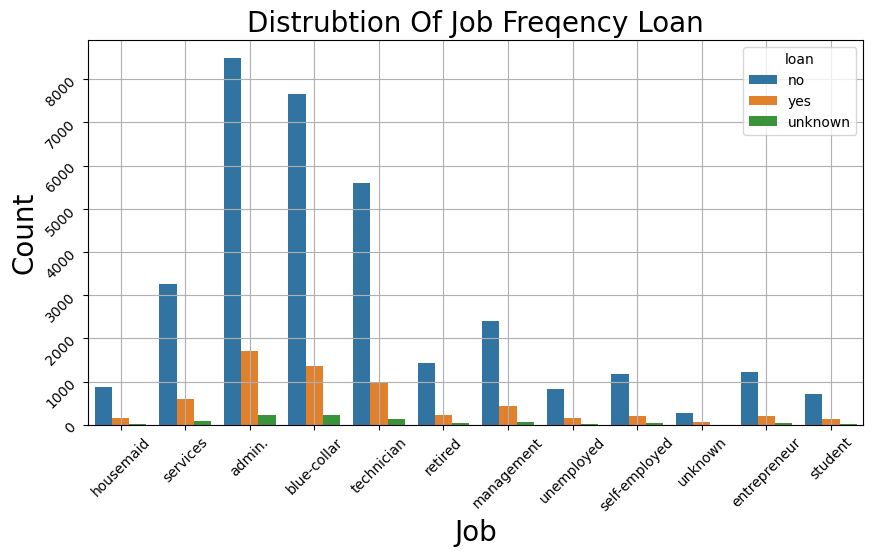

In [803]:
plt.figure(figsize=(10,5))
sns.countplot(x='job',hue='loan',data=data)
plt.grid(True)
plt.title('Distrubtion Of Job Freqency Loan',fontsize=20)
plt.xlabel('Job',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [804]:
data.groupby(['y','loan','job'])['job'].count()

y    loan  job         
no   no    admin.          7364
           blue-collar     7108
           entrepreneur    1104
           housemaid        789
           management      2134
                           ... 
yes  yes   services          52
           student           55
           technician       109
           unemployed        18
           unknown            5
Name: job, Length: 71, dtype: int64

In [805]:
pd.crosstab(data.contact,data.job)

job        admin.  blue-collar  entrepreneur  housemaid  management  retired  \
contact                                                                        
cellular     7123         5090           855        640        1902     1231   
telephone    3296         4163           601        420        1022      487   

job        self-employed  services  student  technician  unemployed  unknown  
contact                                                                       
cellular             893      2309      671        4633         620      168  
telephone            528      1658      204        2106         394      162

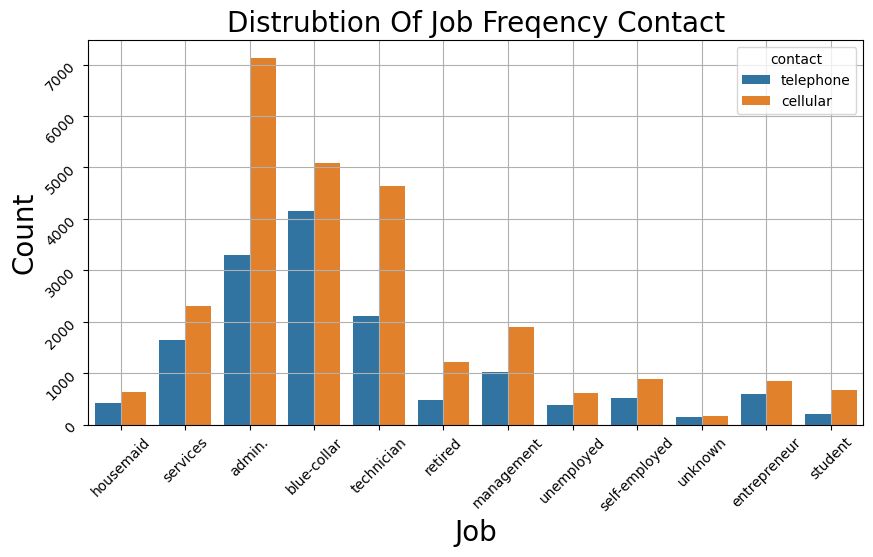

In [806]:
plt.figure(figsize=(10,5))
sns.countplot(x='job',hue='contact',data=data)
plt.grid(True)
plt.title('Distrubtion Of Job Freqency Contact',fontsize=20)
plt.xlabel('Job',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [807]:
pd.crosstab(data.marital,data.job)

job       admin.  blue-collar  entrepreneur  housemaid  management  retired  \
marital                                                                       
divorced    1280          728           179        161         331      348   
married     5250         6686          1071        777        2089     1273   
single      3875         1825           203        119         501       92   
unknown       14           14             3          3           3        5   

job       self-employed  services  student  technician  unemployed  unknown  
marital                                                                      
divorced            133       532        9         773         124       13  
married             904      2293       41        3669         634      234  
single              379      1136      824        2285         251       74  
unknown               5         6        1          12           5        9

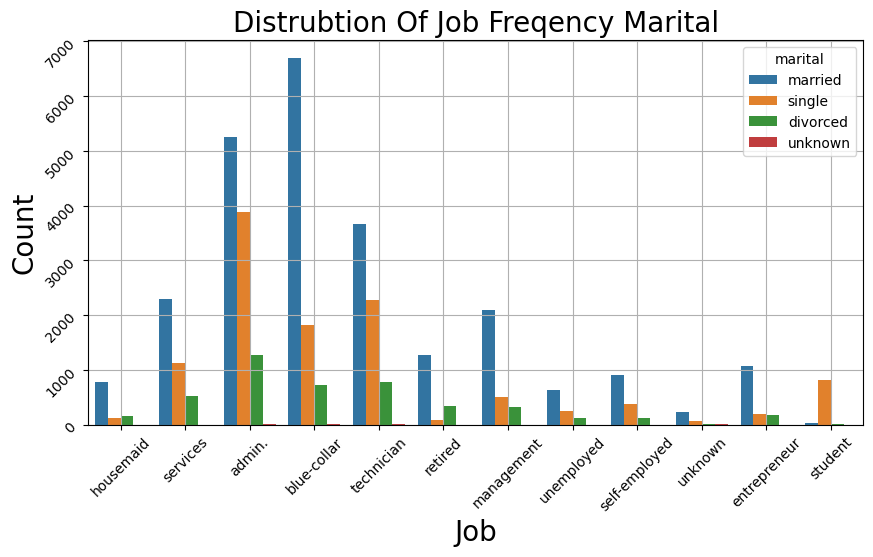

In [808]:
plt.figure(figsize=(10,5))
sns.countplot(x='job',hue='marital',data=data)
plt.grid(True)
plt.title('Distrubtion Of Job Freqency Marital',fontsize=20)
plt.xlabel('Job',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [809]:
pd.crosstab(data.education,data.job)

job                  admin.  blue-collar  entrepreneur  housemaid  management  \
education                                                                       
basic.4y                 77         2318           137        474         100   
basic.6y                151         1425            71         77          85   
basic.9y                499         3623           210         94         166   
high.school            3329          878           234        174         298   
illiterate                1            8             2          1           0   
professional.course     363          453           135         59          89   
university.degree      5750           94           610        139        2063   
unknown                 249          454            57         42         123   

job                  retired  self-employed  services  student  technician  \
education                                                                    
basic.4y                 597             93       132       26          58   
basic.6y                  75             25       226       13          87   
basic.9y                 145            220       388       99         384   
high.school              276            118      2680      357         872   
illiterate                 3              3         0        0           0   
professional.course      241            168       218       43        3317   
university.degree        284            765       173      170        1809   
unknown                   97             29       150      167         212   

job                  unemployed  unknown  
education                                 
basic.4y                    112       52  
basic.6y                     34       22  
basic.9y                    186       31  
high.school                 259       37  
illiterate                    0        0  
professional.course         142       12  
university.degree           262       45  
unknown                      19      131

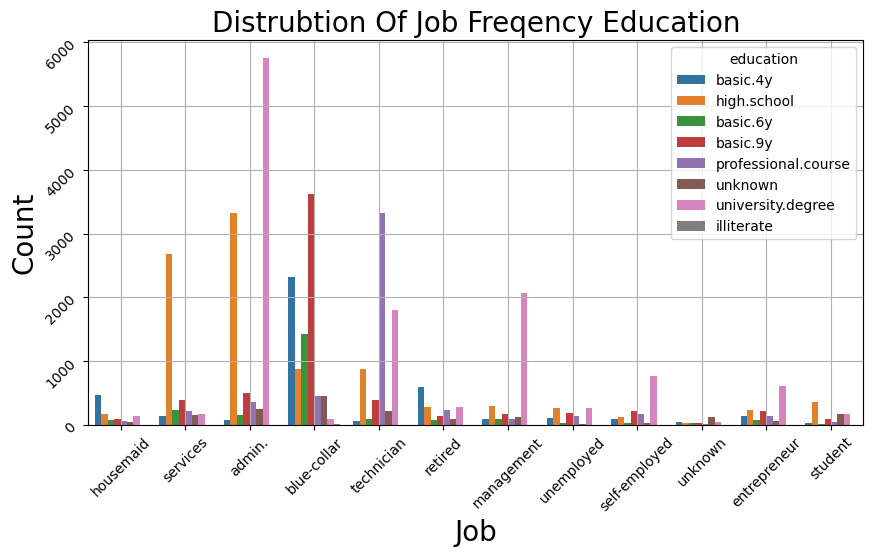

In [810]:
plt.figure(figsize=(10,5))
sns.countplot(x='job',hue='education',data=data)
plt.grid(True)
plt.title('Distrubtion Of Job Freqency Education',fontsize=20)
plt.xlabel('Job',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [811]:
pd.crosstab(data.default,data.job)

job      admin.  blue-collar  entrepreneur  housemaid  management  retired  \
default                                                                      
no         9126         6087          1155        741        2466     1325   
unknown    1293         3166           301        319         458      393   
yes           0            0             0          0           0        0   

job      self-employed  services  student  technician  unemployed  unknown  
default                                                                     
no                1139      3052      771        5761         776      178  
unknown            282       915      104         976         237      152  
yes                  0         0        0           2           1        0

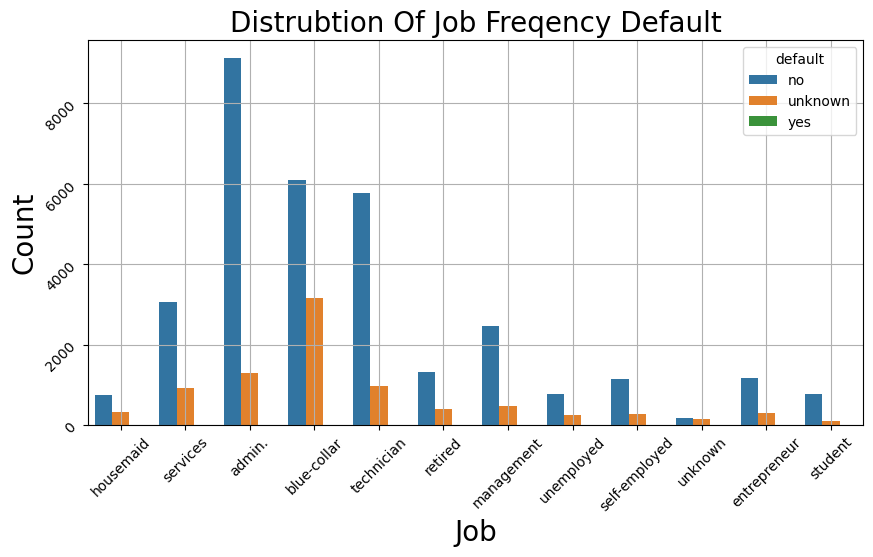

In [812]:
plt.figure(figsize=(10,5))
sns.countplot(x='job',hue='default',data=data)
plt.grid(True)
plt.title('Distrubtion Of Job Freqency Default',fontsize=20)
plt.xlabel('Job',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [813]:
pd.crosstab(data.housing,data.job)

job      admin.  blue-collar  entrepreneur  housemaid  management  retired  \
housing                                                                      
no         4634         4303           641        491        1363      782   
unknown     227          240            36         29          71       44   
yes        5558         4710           779        540        1490      892   

job      self-employed  services  student  technician  unemployed  unknown  
housing                                                                     
no                 641      1817      381        2979         430      153  
unknown             40       101       23         147          27        5  
yes                740      2049      471        3613         557      172

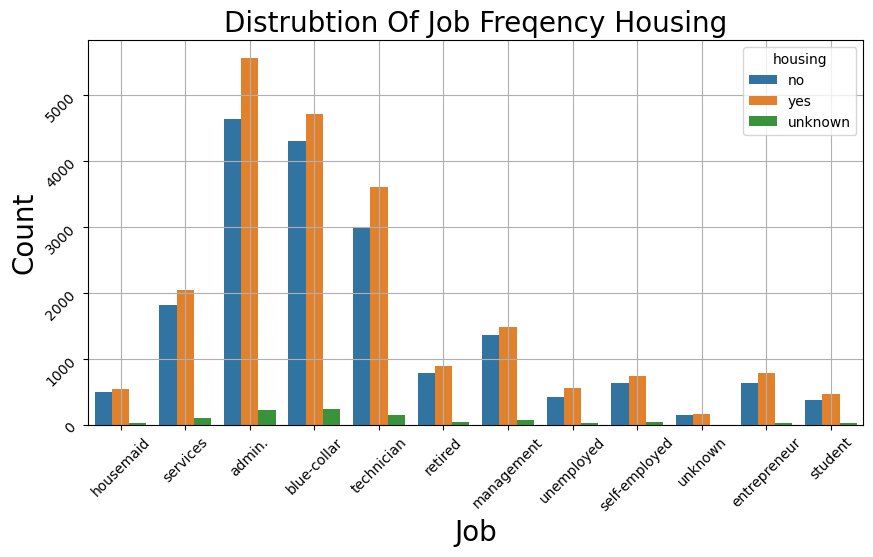

In [814]:
plt.figure(figsize=(10,5))
sns.countplot(x='job',hue='housing',data=data)
plt.grid(True)
plt.title('Distrubtion Of Job Freqency Housing',fontsize=20)
plt.xlabel('Job',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [815]:
data.education.value_counts()

university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64

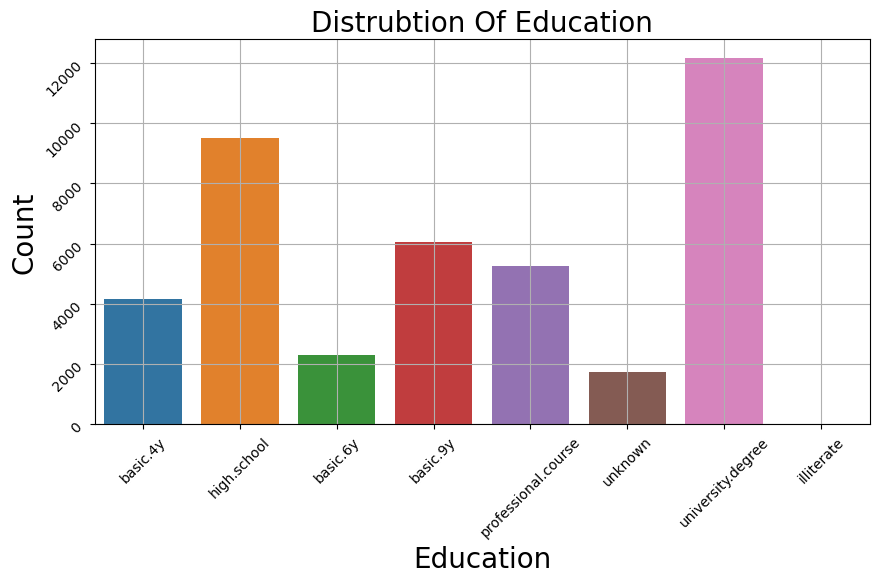

In [816]:
plt.figure(figsize=(10,5))
sns.countplot(x='education',data=data)
plt.grid(True)
plt.title('Distrubtion Of Education',fontsize=20)
plt.xlabel('Education',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [817]:
pd.crosstab(data.y,data.education)

education  basic.4y  basic.6y  basic.9y  high.school  illiterate  \
y                                                                  
no             3748      2103      5572         8481          14   
yes             428       188       473         1031           4   

education  professional.course  university.degree  unknown  
y                                                           
no                        4645              10495     1479  
yes                        595               1669      251

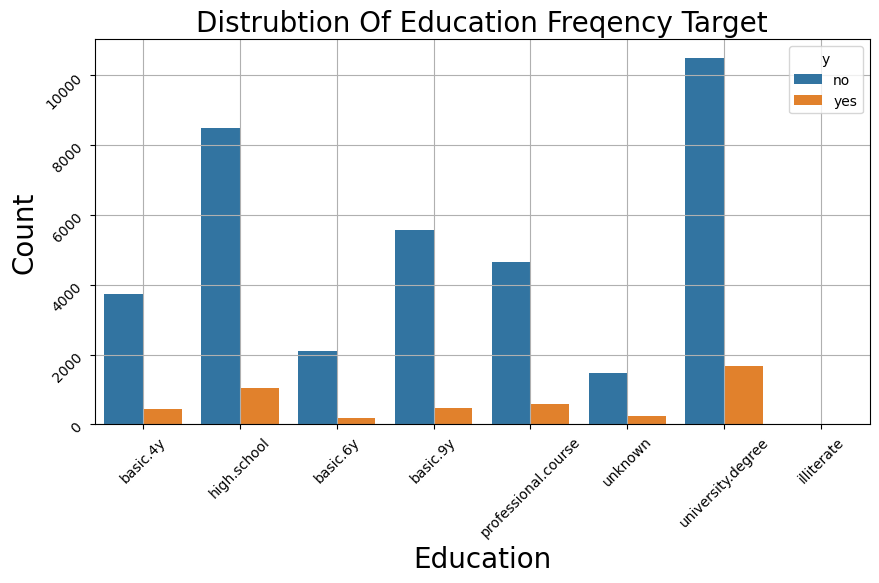

In [818]:
plt.figure(figsize=(10,5))
sns.countplot(x='education',hue='y',data=data)
plt.grid(True)
plt.title('Distrubtion Of Education Freqency Target',fontsize=20)
plt.xlabel('Education',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [819]:
data.marital.value_counts()

married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64

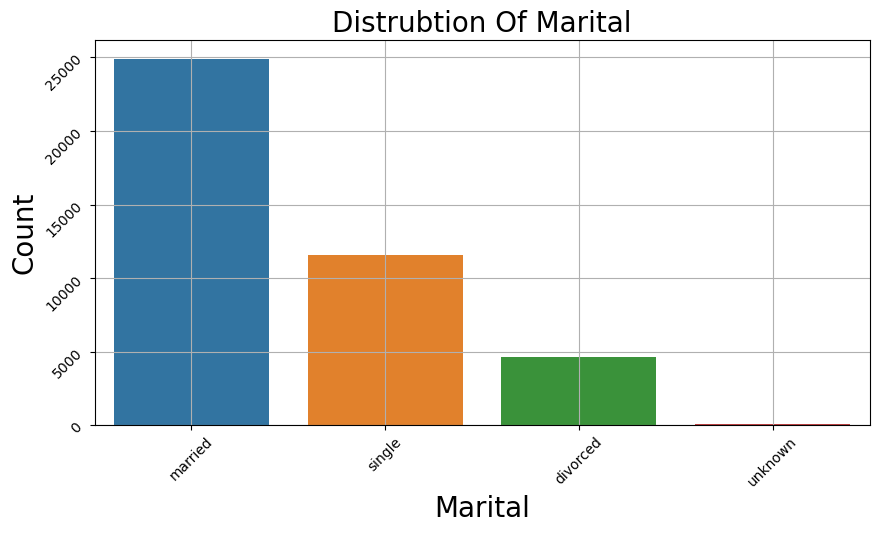

In [820]:
plt.figure(figsize=(10,5))
sns.countplot(x='marital',data=data)
plt.grid(True)
plt.title('Distrubtion Of Marital',fontsize=20)
plt.xlabel('Marital',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [821]:
pd.crosstab(data.y,data.marital)

marital  divorced  married  single  unknown
y                                          
no           4135    22390    9944       68
yes           476     2531    1620       12

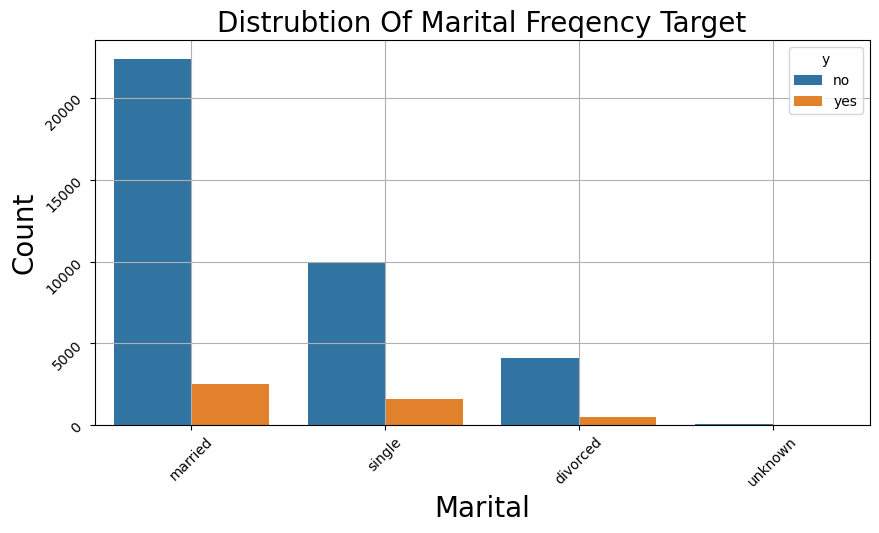

In [822]:
plt.figure(figsize=(10,5))
sns.countplot(x='marital',hue='y',data=data)
plt.grid(True)
plt.title('Distrubtion Of Marital Freqency Target',fontsize=20)
plt.xlabel('Marital',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [823]:
data.loan.value_counts()

no         33938
yes         6248
unknown      990
Name: loan, dtype: int64

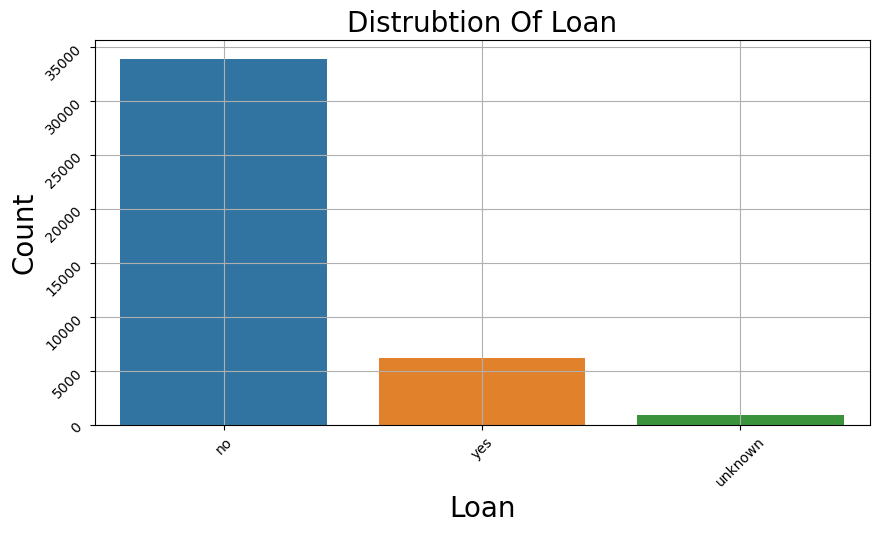

In [824]:
plt.figure(figsize=(10,5))
sns.countplot(x='loan',data=data)
plt.grid(True)
plt.title('Distrubtion Of Loan',fontsize=20)
plt.xlabel('Loan',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [825]:
pd.crosstab(data.y,data.loan)

loan     no  unknown   yes
y                         
no    30089      883  5565
yes    3849      107   683

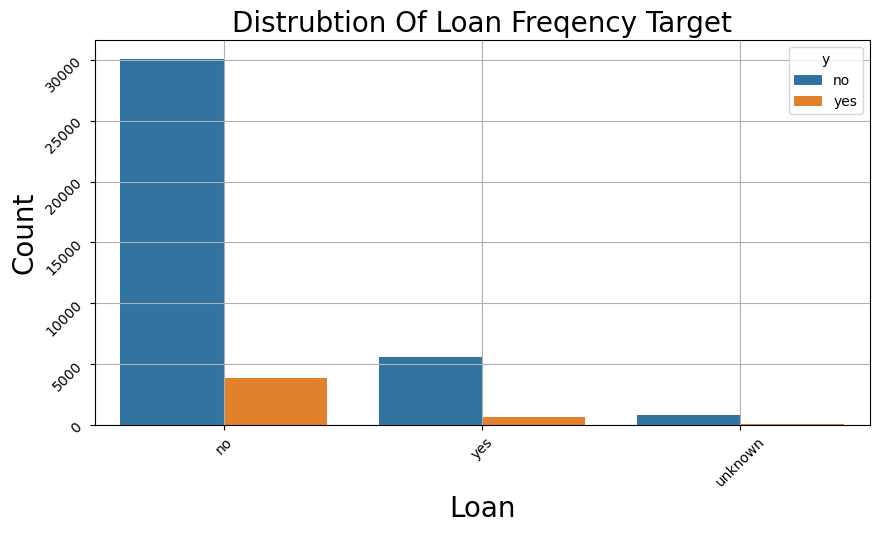

In [826]:
plt.figure(figsize=(10,5))
sns.countplot(x='loan',hue='y',data=data)
plt.grid(True)
plt.title('Distrubtion Of Loan Freqency Target',fontsize=20)
plt.xlabel('Loan',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [827]:
data.default.value_counts()

no         32577
unknown     8596
yes            3
Name: default, dtype: int64

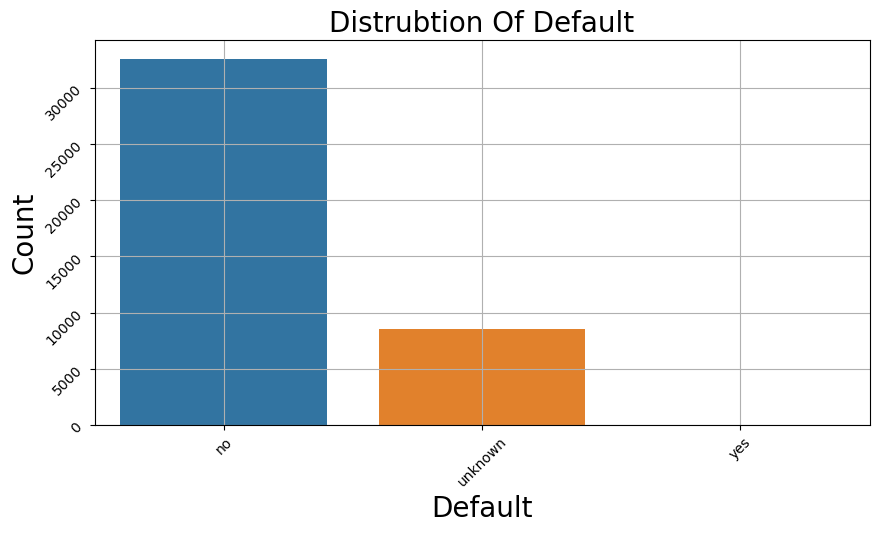

In [828]:
plt.figure(figsize=(10,5))
sns.countplot(x='default',data=data)
plt.grid(True)
plt.title('Distrubtion Of Default',fontsize=20)
plt.xlabel('Default',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [829]:
pd.crosstab(data.y,data.default)

default     no  unknown  yes
y                           
no       28381     8153    3
yes       4196      443    0

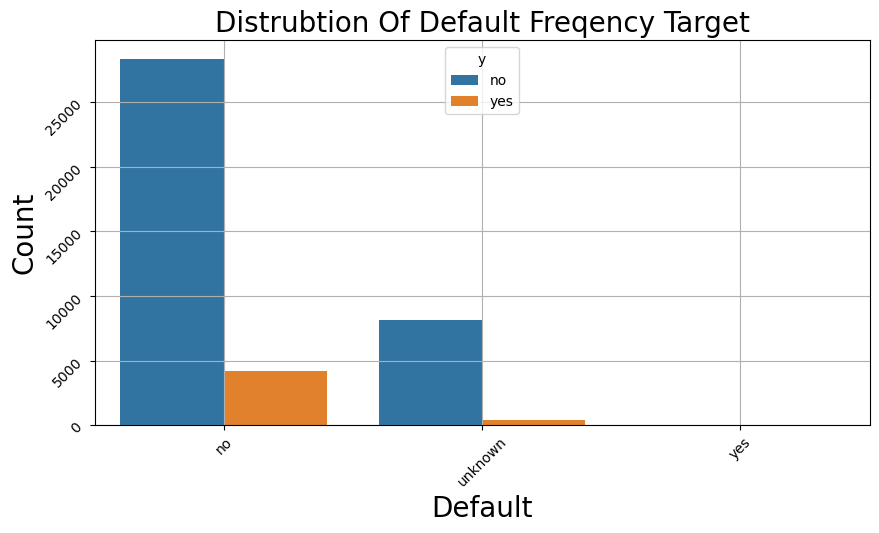

In [830]:
plt.figure(figsize=(10,5))
sns.countplot(x='default',hue='y',data=data)
plt.grid(True)
plt.title('Distrubtion Of Default Freqency Target',fontsize=20)
plt.xlabel('Default',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [831]:
data.contact.value_counts()

cellular     26135
telephone    15041
Name: contact, dtype: int64

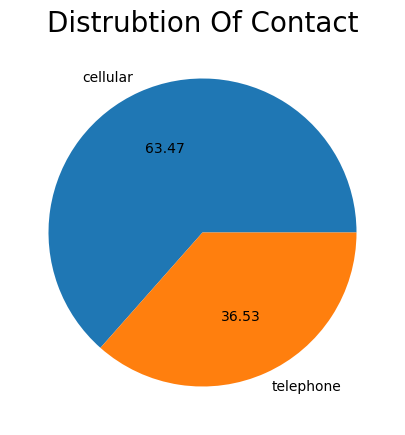

In [832]:
plt.figure(figsize=(10,5))
plt.pie(data.contact.value_counts().values,labels=data.contact.value_counts().index,
           autopct='%.2f')
plt.title('Distrubtion Of Contact',fontsize=20)
plt.show()

In [833]:
pd.crosstab(data.y,data.contact)

contact  cellular  telephone
y                           
no          22283      14254
yes          3852        787

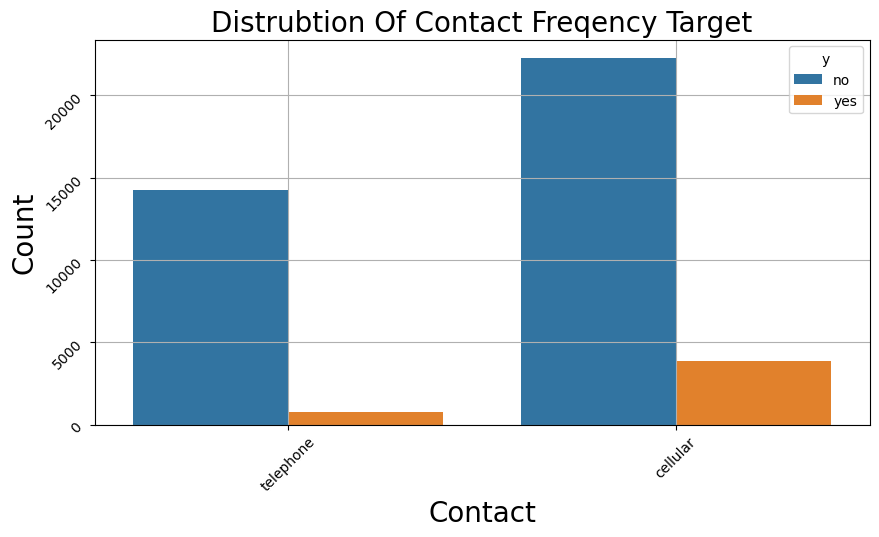

In [834]:
plt.figure(figsize=(10,5))
sns.countplot(x='contact',hue='y',data=data)
plt.grid(True)
plt.title('Distrubtion Of Contact Freqency Target',fontsize=20)
plt.xlabel('Contact',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [835]:
data.y.value_counts()

no     36537
yes     4639
Name: y, dtype: int64

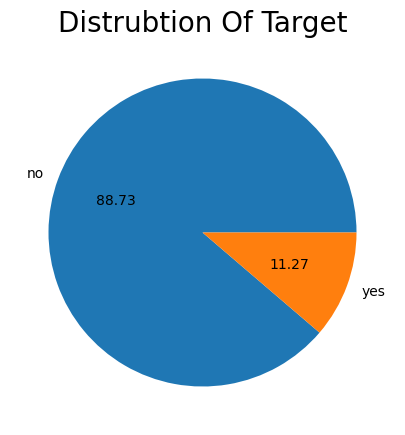

In [836]:
plt.figure(figsize=(10,5))
plt.pie(data.y.value_counts().values,labels=data.y.value_counts().index,
           autopct='%.2f')
plt.title('Distrubtion Of Target',fontsize=20)
plt.show()

In [837]:
data.month.value_counts()

may    13767
jul     7169
aug     6176
jun     5318
nov     4100
apr     2631
oct      717
sep      570
mar      546
dec      182
Name: month, dtype: int64

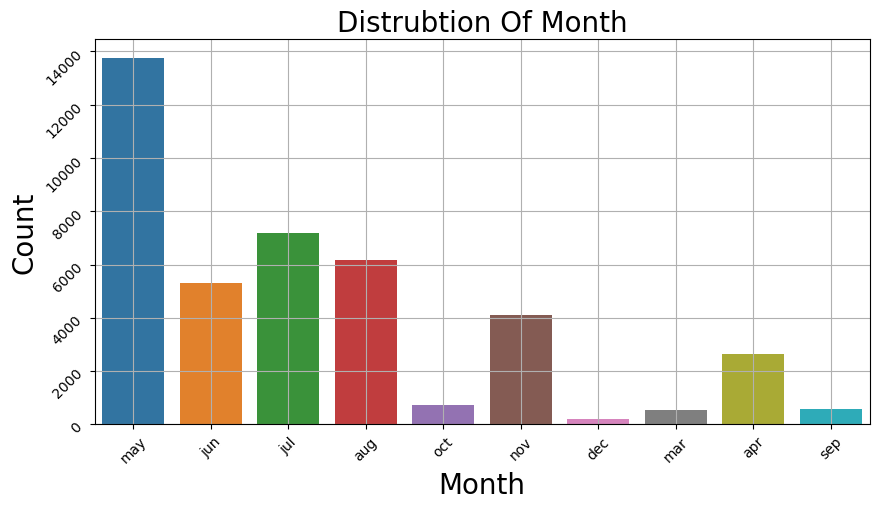

In [838]:
plt.figure(figsize=(10,5))
sns.countplot(x='month',data=data)
plt.grid(True)
plt.title('Distrubtion Of Month',fontsize=20)
plt.xlabel('Month',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [839]:
pd.crosstab(data.y,data.month)

month   apr   aug  dec   jul   jun  mar    may   nov  oct  sep
y                                                             
no     2092  5521   93  6521  4759  270  12881  3684  402  314
yes     539   655   89   648   559  276    886   416  315  256

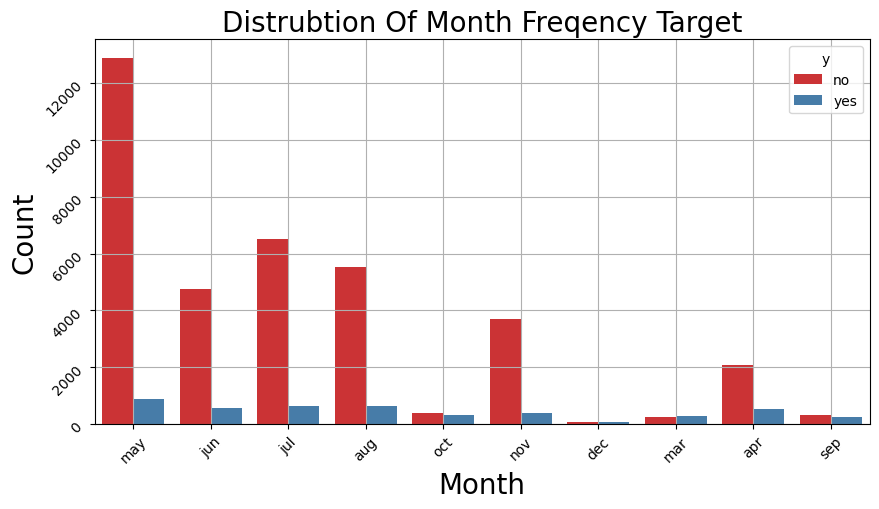

In [840]:
plt.figure(figsize=(10,5))
sns.countplot(x='month',hue='y',data=data,palette='Set1')
plt.grid(True)
plt.title('Distrubtion Of Month Freqency Target',fontsize=20)
plt.xlabel('Month',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [841]:
data.day_of_week.value_counts()

thu    8618
mon    8512
wed    8134
tue    8086
fri    7826
Name: day_of_week, dtype: int64

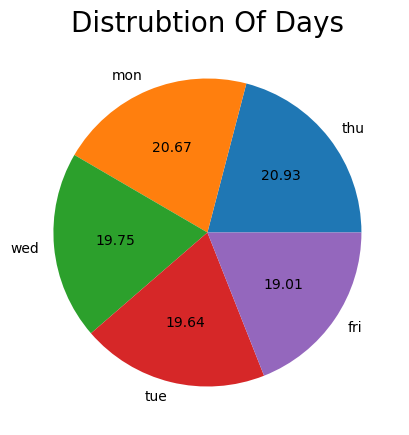

In [842]:
plt.figure(figsize=(10,5))
plt.pie(data.day_of_week.value_counts().values,labels=data.day_of_week.value_counts().index,
           autopct='%.2f')
plt.title('Distrubtion Of Days',fontsize=20)
plt.show()

In [843]:
pd.crosstab(data.month,data.day_of_week)

day_of_week   fri   mon   thu   tue   wed
month                                    
apr           610   702   768   251   300
aug          1070  1221  1347  1295  1243
dec            24    53    45    25    35
jul          1012  1515  1668  1517  1457
jun          1147  1251   967   970   983
mar            94   143    99   140    70
may          2857  2642  2536  2809  2923
nov           755   766   903   813   863
oct           142   129   163   148   135
sep           115    90   122   118   125

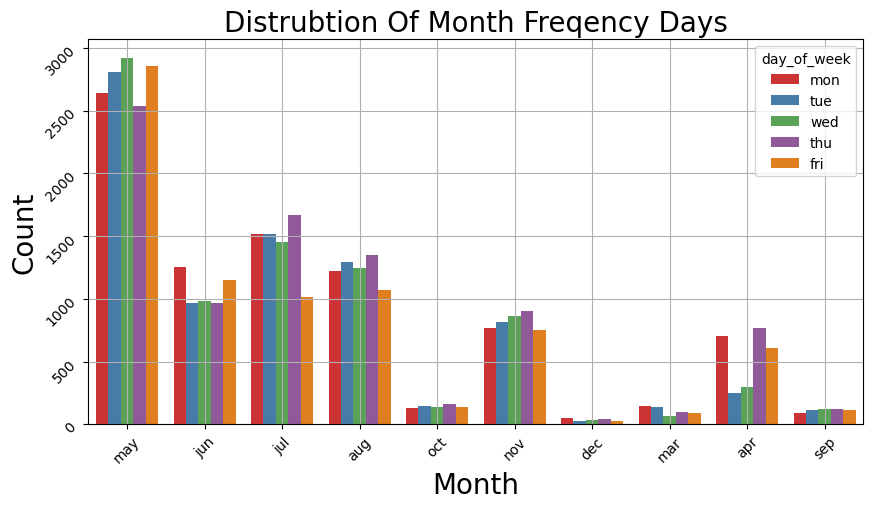

In [844]:
plt.figure(figsize=(10,5))
sns.countplot(x='month',hue='day_of_week',data=data,palette='Set1')
plt.grid(True)
plt.title('Distrubtion Of Month Freqency Days',fontsize=20)
plt.xlabel('Month',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

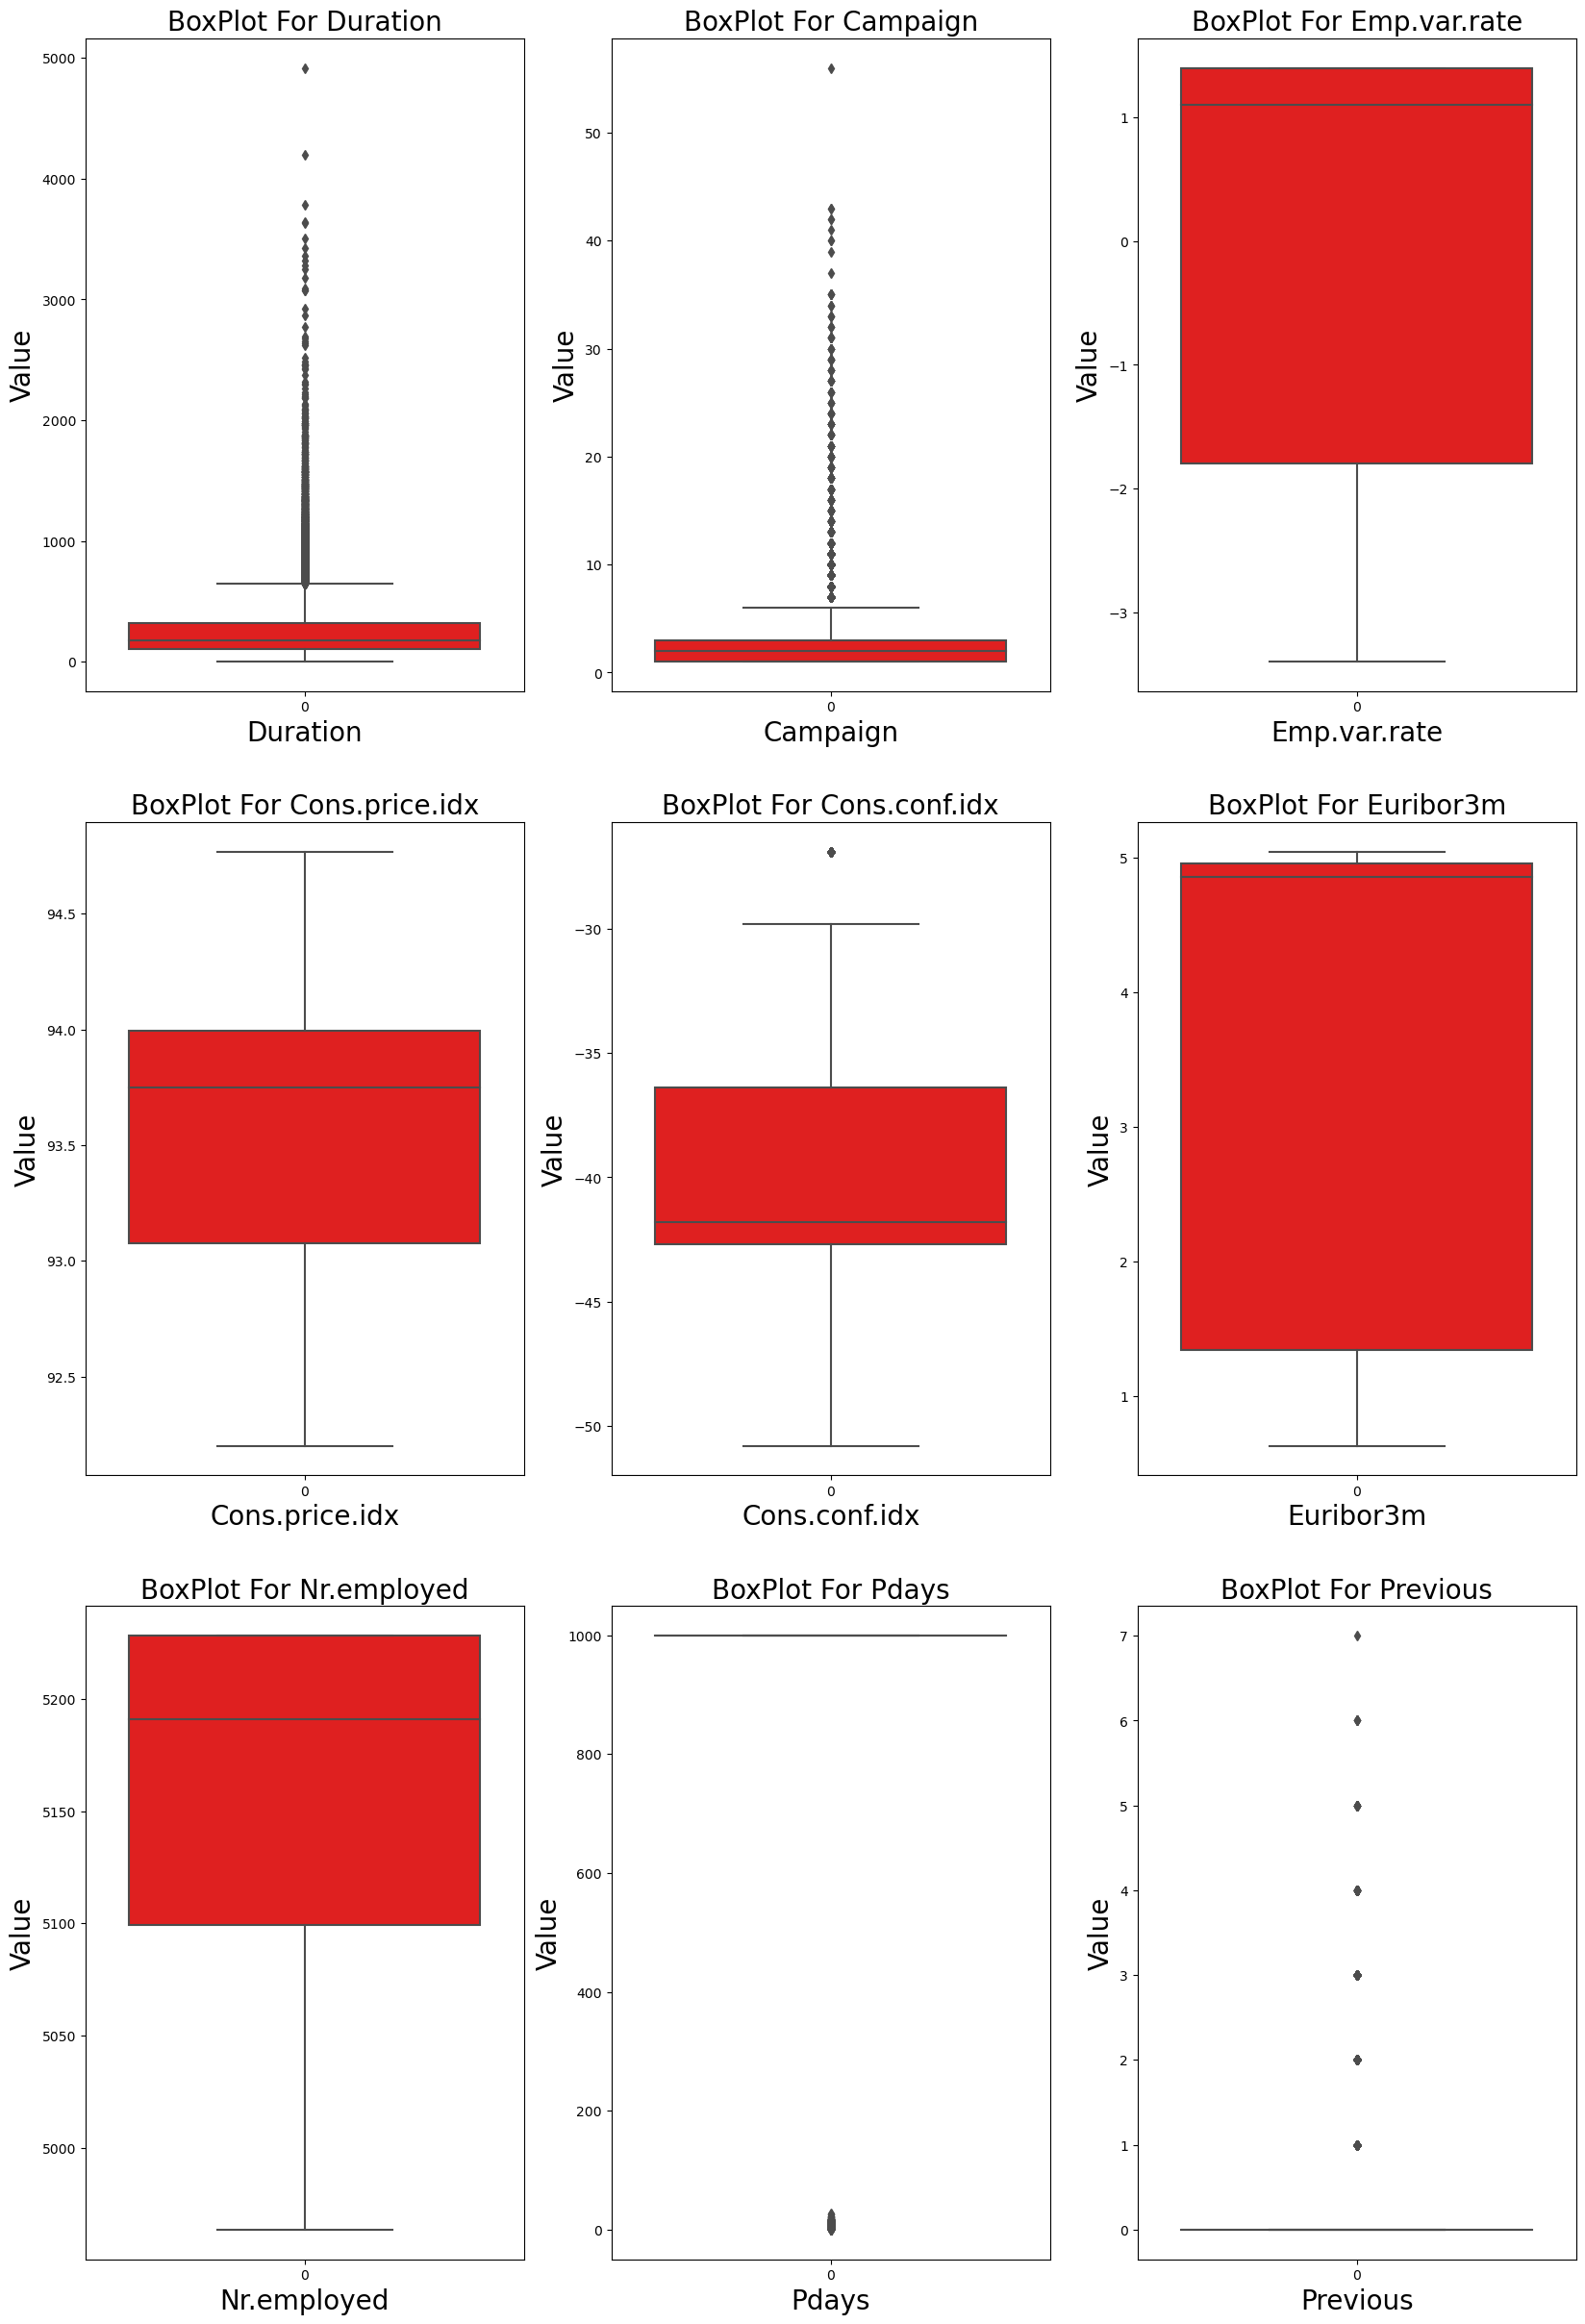

In [845]:
li=['duration','campaign','emp.var.rate','cons.price.idx',
    'cons.conf.idx','euribor3m','nr.employed','pdays','previous']
plt.figure(figsize=(20,30))
for i,x in enumerate(li):
    plt.subplot(3,3,i+1)
    sns.boxplot(data=data[x],color='r')
    plt.title(f'BoxPlot For {x[0].upper()+x[1:]}',fontsize=20)
    plt.xlabel(f'{x[0].upper()+x[1:]}',fontsize=20)
    plt.ylabel('Value',fontsize=20)

In [846]:
for i in li:
    q25,q75=np.percentile(data[i],(25,75))
    qr=q75-q25
    max=q75+qr*1.5
    min=q25-qr*1.5
    data[i][data[i]>max]=max
    data[i][data[i]<min]=min
    print(f'For {i} :\n',q25,q75,qr,max,min)

For duration :
 102.0 319.0 217.0 644.5 -223.5
For campaign :
 1.0 3.0 2.0 6.0 -2.0
For emp.var.rate :
 -1.8 1.4 3.2 6.200000000000001 -6.6000000000000005
For cons.price.idx :
 93.075 93.994 0.9189999999999969 95.3725 91.69650000000001
For cons.conf.idx :
 -42.7 -36.4 6.300000000000004 -26.949999999999992 -52.150000000000006
For euribor3m :
 1.344 4.961 3.617 10.3865 -4.081499999999999
For nr.employed :
 5099.1 5228.1 129.0 5421.6 4905.6
For pdays :
 999.0 999.0 0.0 999.0 999.0
For previous :
 0.0 0.0 0.0 0.0 0.0


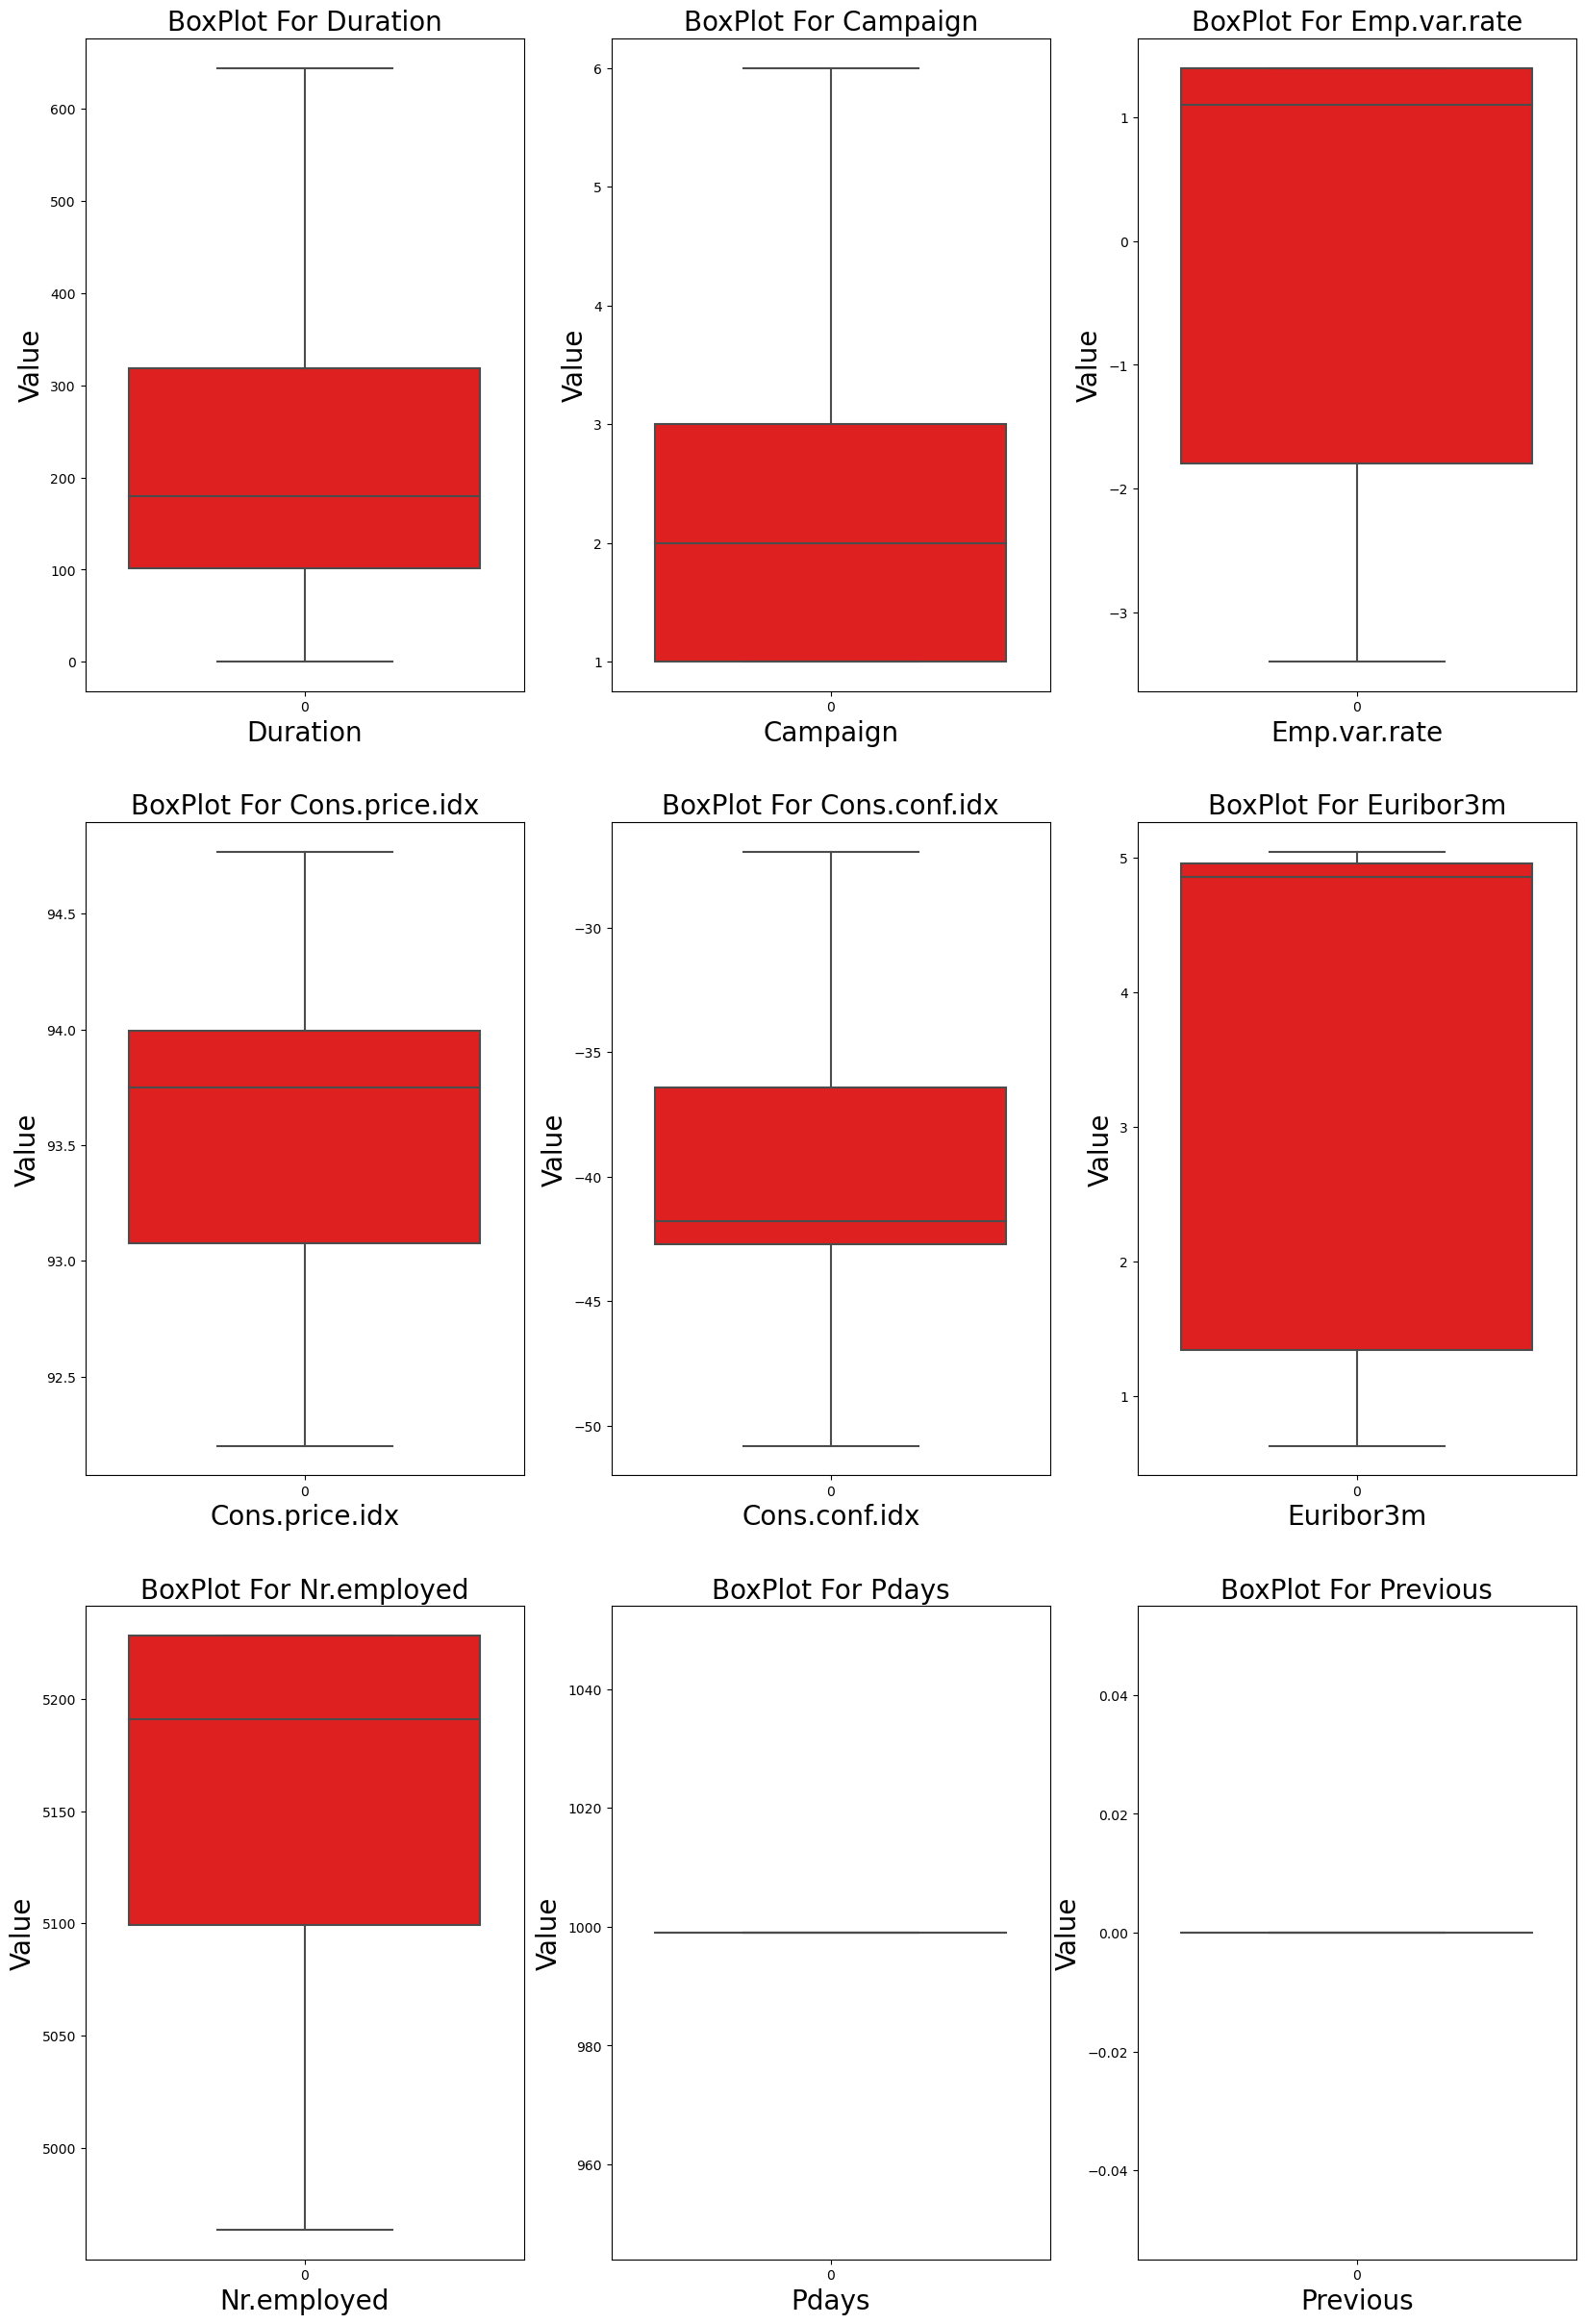

In [847]:
plt.figure(figsize=(20,30))
for i,x in enumerate(li):
    plt.subplot(3,3,i+1)
    sns.boxplot(data=data[x],color='r')
    plt.title(f'BoxPlot For {x[0].upper()+x[1:]}',fontsize=20)
    plt.xlabel(f'{x[0].upper()+x[1:]}',fontsize=20)
    plt.ylabel('Value',fontsize=20)

In [848]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]
X

age          job  marital            education  default housing loan  \
0      56.0    housemaid  married             basic.4y       no      no   no   
1      57.0     services  married          high.school  unknown      no   no   
2      37.0     services  married          high.school       no     yes   no   
3      40.0       admin.  married             basic.6y       no      no   no   
4      56.0     services  married          high.school       no      no  yes   
...     ...          ...      ...                  ...      ...     ...  ...   
41183  69.5      retired  married  professional.course       no     yes   no   
41184  46.0  blue-collar  married  professional.course       no      no   no   
41185  56.0      retired  married    university.degree       no     yes   no   
41186  44.0   technician  married  professional.course       no      no   no   
41187  69.5      retired  married  professional.course       no     yes   no   

         contact month day_of_week  duration  campaign  pdays  previous  \
0      telephone   may         mon     261.0         1    999         0   
1      telephone   may         mon     149.0         1    999         0   
2      telephone   may         mon     226.0         1    999         0   
3      telephone   may         mon     151.0         1    999         0   
4      telephone   may         mon     307.0         1    999         0   
...          ...   ...         ...       ...       ...    ...       ...   
41183   cellular   nov         fri     334.0         1    999         0   
41184   cellular   nov         fri     383.0         1    999         0   
41185   cellular   nov         fri     189.0         2    999         0   
41186   cellular   nov         fri     442.0         1    999         0   
41187   cellular   nov         fri     239.0         3    999         0   

          poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent           1.1          93.994          -36.4      4.857   
1      nonexistent           1.1          93.994          -36.4      4.857   
2      nonexistent           1.1          93.994          -36.4      4.857   
3      nonexistent           1.1          93.994          -36.4      4.857   
4      nonexistent           1.1          93.994          -36.4      4.857   
...            ...           ...             ...            ...        ...   
41183  nonexistent          -1.1          94.767          -50.8      1.028   
41184  nonexistent          -1.1          94.767          -50.8      1.028   
41185  nonexistent          -1.1          94.767          -50.8      1.028   
41186  nonexistent          -1.1          94.767          -50.8      1.028   
41187      failure          -1.1          94.767          -50.8      1.028   

       nr.employed  
0           5191.0  
1           5191.0  
2           5191.0  
3           5191.0  
4           5191.0  
...            ...  
41183       4963.6  
41184       4963.6  
41185       4963.6  
41186       4963.6  
41187       4963.6  

[41176 rows x 20 columns]

In [849]:
y

0         no
1         no
2         no
3         no
4         no
        ... 
41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: y, Length: 41176, dtype: object

In [850]:
y.replace('no',0,inplace=True)
y.replace('yes',1,inplace=True)
y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41176, dtype: int64

In [851]:
X=pd.get_dummies(X)
key=X.keys()
X

age  duration  campaign  pdays  previous  emp.var.rate  \
0      56.0     261.0         1    999         0           1.1   
1      57.0     149.0         1    999         0           1.1   
2      37.0     226.0         1    999         0           1.1   
3      40.0     151.0         1    999         0           1.1   
4      56.0     307.0         1    999         0           1.1   
...     ...       ...       ...    ...       ...           ...   
41183  69.5     334.0         1    999         0          -1.1   
41184  46.0     383.0         1    999         0          -1.1   
41185  56.0     189.0         2    999         0          -1.1   
41186  44.0     442.0         1    999         0          -1.1   
41187  69.5     239.0         3    999         0          -1.1   

       cons.price.idx  cons.conf.idx  euribor3m  nr.employed  ...  month_oct  \
0              93.994          -36.4      4.857       5191.0  ...          0   
1              93.994          -36.4      4.857       5191.0  ...          0   
2              93.994          -36.4      4.857       5191.0  ...          0   
3              93.994          -36.4      4.857       5191.0  ...          0   
4              93.994          -36.4      4.857       5191.0  ...          0   
...               ...            ...        ...          ...  ...        ...   
41183          94.767          -50.8      1.028       4963.6  ...          0   
41184          94.767          -50.8      1.028       4963.6  ...          0   
41185          94.767          -50.8      1.028       4963.6  ...          0   
41186          94.767          -50.8      1.028       4963.6  ...          0   
41187          94.767          -50.8      1.028       4963.6  ...          0   

       month_sep  day_of_week_fri  day_of_week_mon  day_of_week_thu  \
0              0                0                1                0   
1              0                0                1                0   
2              0                0                1                0   
3              0                0                1                0   
4              0                0                1                0   
...          ...              ...              ...              ...   
41183          0                1                0                0   
41184          0                1                0                0   
41185          0                1                0                0   
41186          0                1                0                0   
41187          0                1                0                0   

       day_of_week_tue  day_of_week_wed  poutcome_failure  \
0                    0                0                 0   
1                    0                0                 0   
2                    0                0                 0   
3                    0                0                 0   
4                    0                0                 0   
...                ...              ...               ...   
41183                0                0                 0   
41184                0                0                 0   
41185                0                0                 0   
41186                0                0                 0   
41187                0                0                 1   

       poutcome_nonexistent  poutcome_success  
0                         1                 0  
1                         1                 0  
2                         1                 0  
3                         1                 0  
4                         1                 0  
...                     ...               ...  
41183                     1                 0  
41184                     1                 0  
41185                     1                 0  
41186                     1                 0  
41187                     0                 0  

[41176 rows x 63 columns]

age  duration  campaign  pdays  previous  \
age                   1.000000  0.001993  0.003337    NaN       NaN   
duration              0.001993  1.000000 -0.080158    NaN       NaN   
campaign              0.003337 -0.080158  1.000000    NaN       NaN   
pdays                      NaN       NaN       NaN    NaN       NaN   
previous                   NaN       NaN       NaN    NaN       NaN   
...                        ...       ...       ...    ...       ...   
day_of_week_wed      -0.024997  0.021267 -0.024182    NaN       NaN   
poutcome_failure     -0.005485 -0.008749 -0.069810    NaN       NaN   
poutcome_nonexistent -0.009710 -0.025009  0.091966    NaN       NaN   
poutcome_success      0.027872  0.062670 -0.057598    NaN       NaN   
y                     0.020918  0.401306 -0.069397    NaN       NaN   

                      emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
age                       0.012335        0.006923       0.126550   0.024153   
duration                 -0.044965        0.001459      -0.006573  -0.052405   
campaign                  0.148617        0.114822      -0.018834   0.129392   
pdays                          NaN             NaN            NaN        NaN   
previous                       NaN             NaN            NaN        NaN   
...                            ...             ...            ...        ...   
day_of_week_wed           0.026791        0.012434       0.023756   0.030206   
poutcome_failure         -0.381795       -0.297799      -0.162719  -0.385482   
poutcome_nonexistent      0.472613        0.304354       0.099845   0.488492   
poutcome_success         -0.256942       -0.077446       0.084806  -0.281066   
y                        -0.298289       -0.136134       0.054713  -0.307740   

                      nr.employed  ...  month_sep  day_of_week_fri  \
age                     -0.002228  ...   0.033905         0.007875   
duration                -0.068737  ...   0.022189        -0.018178   
campaign                 0.142535  ...  -0.040889         0.034256   
pdays                         NaN  ...        NaN              NaN   
previous                      NaN  ...        NaN              NaN   
...                           ...  ...        ...              ...   
day_of_week_wed          0.023284  ...   0.006474        -0.240348   
poutcome_failure        -0.349654  ...   0.053374         0.019295   
poutcome_nonexistent     0.493130  ...  -0.125364        -0.009895   
poutcome_success        -0.350663  ...   0.149344        -0.013776   
y                       -0.354669  ...   0.126079        -0.006989   

                      day_of_week_mon  day_of_week_thu  day_of_week_tue  \
age                          0.020334        -0.021571         0.018637   
duration                    -0.023220         0.012224         0.007790   
campaign                     0.035666        -0.018521        -0.026987   
pdays                             NaN              NaN              NaN   
previous                          NaN              NaN              NaN   
...                               ...              ...              ...   
day_of_week_wed             -0.253280        -0.255266        -0.245266   
poutcome_failure            -0.001179        -0.004498        -0.006026   
poutcome_nonexistent         0.002238        -0.000644         0.001534   
poutcome_success            -0.002281         0.008857         0.007279   
y                           -0.021241         0.013797         0.008123   

                      day_of_week_wed  poutcome_failure  poutcome_nonexistent  \
age                         -0.024997         -0.005485             -0.009710   
duration                     0.021267         -0.008749             -0.025009   
campaign                    -0.024182         -0.069810              0.091966   
pdays                             NaN               NaN                   NaN   
previous                          NaN               NaN           

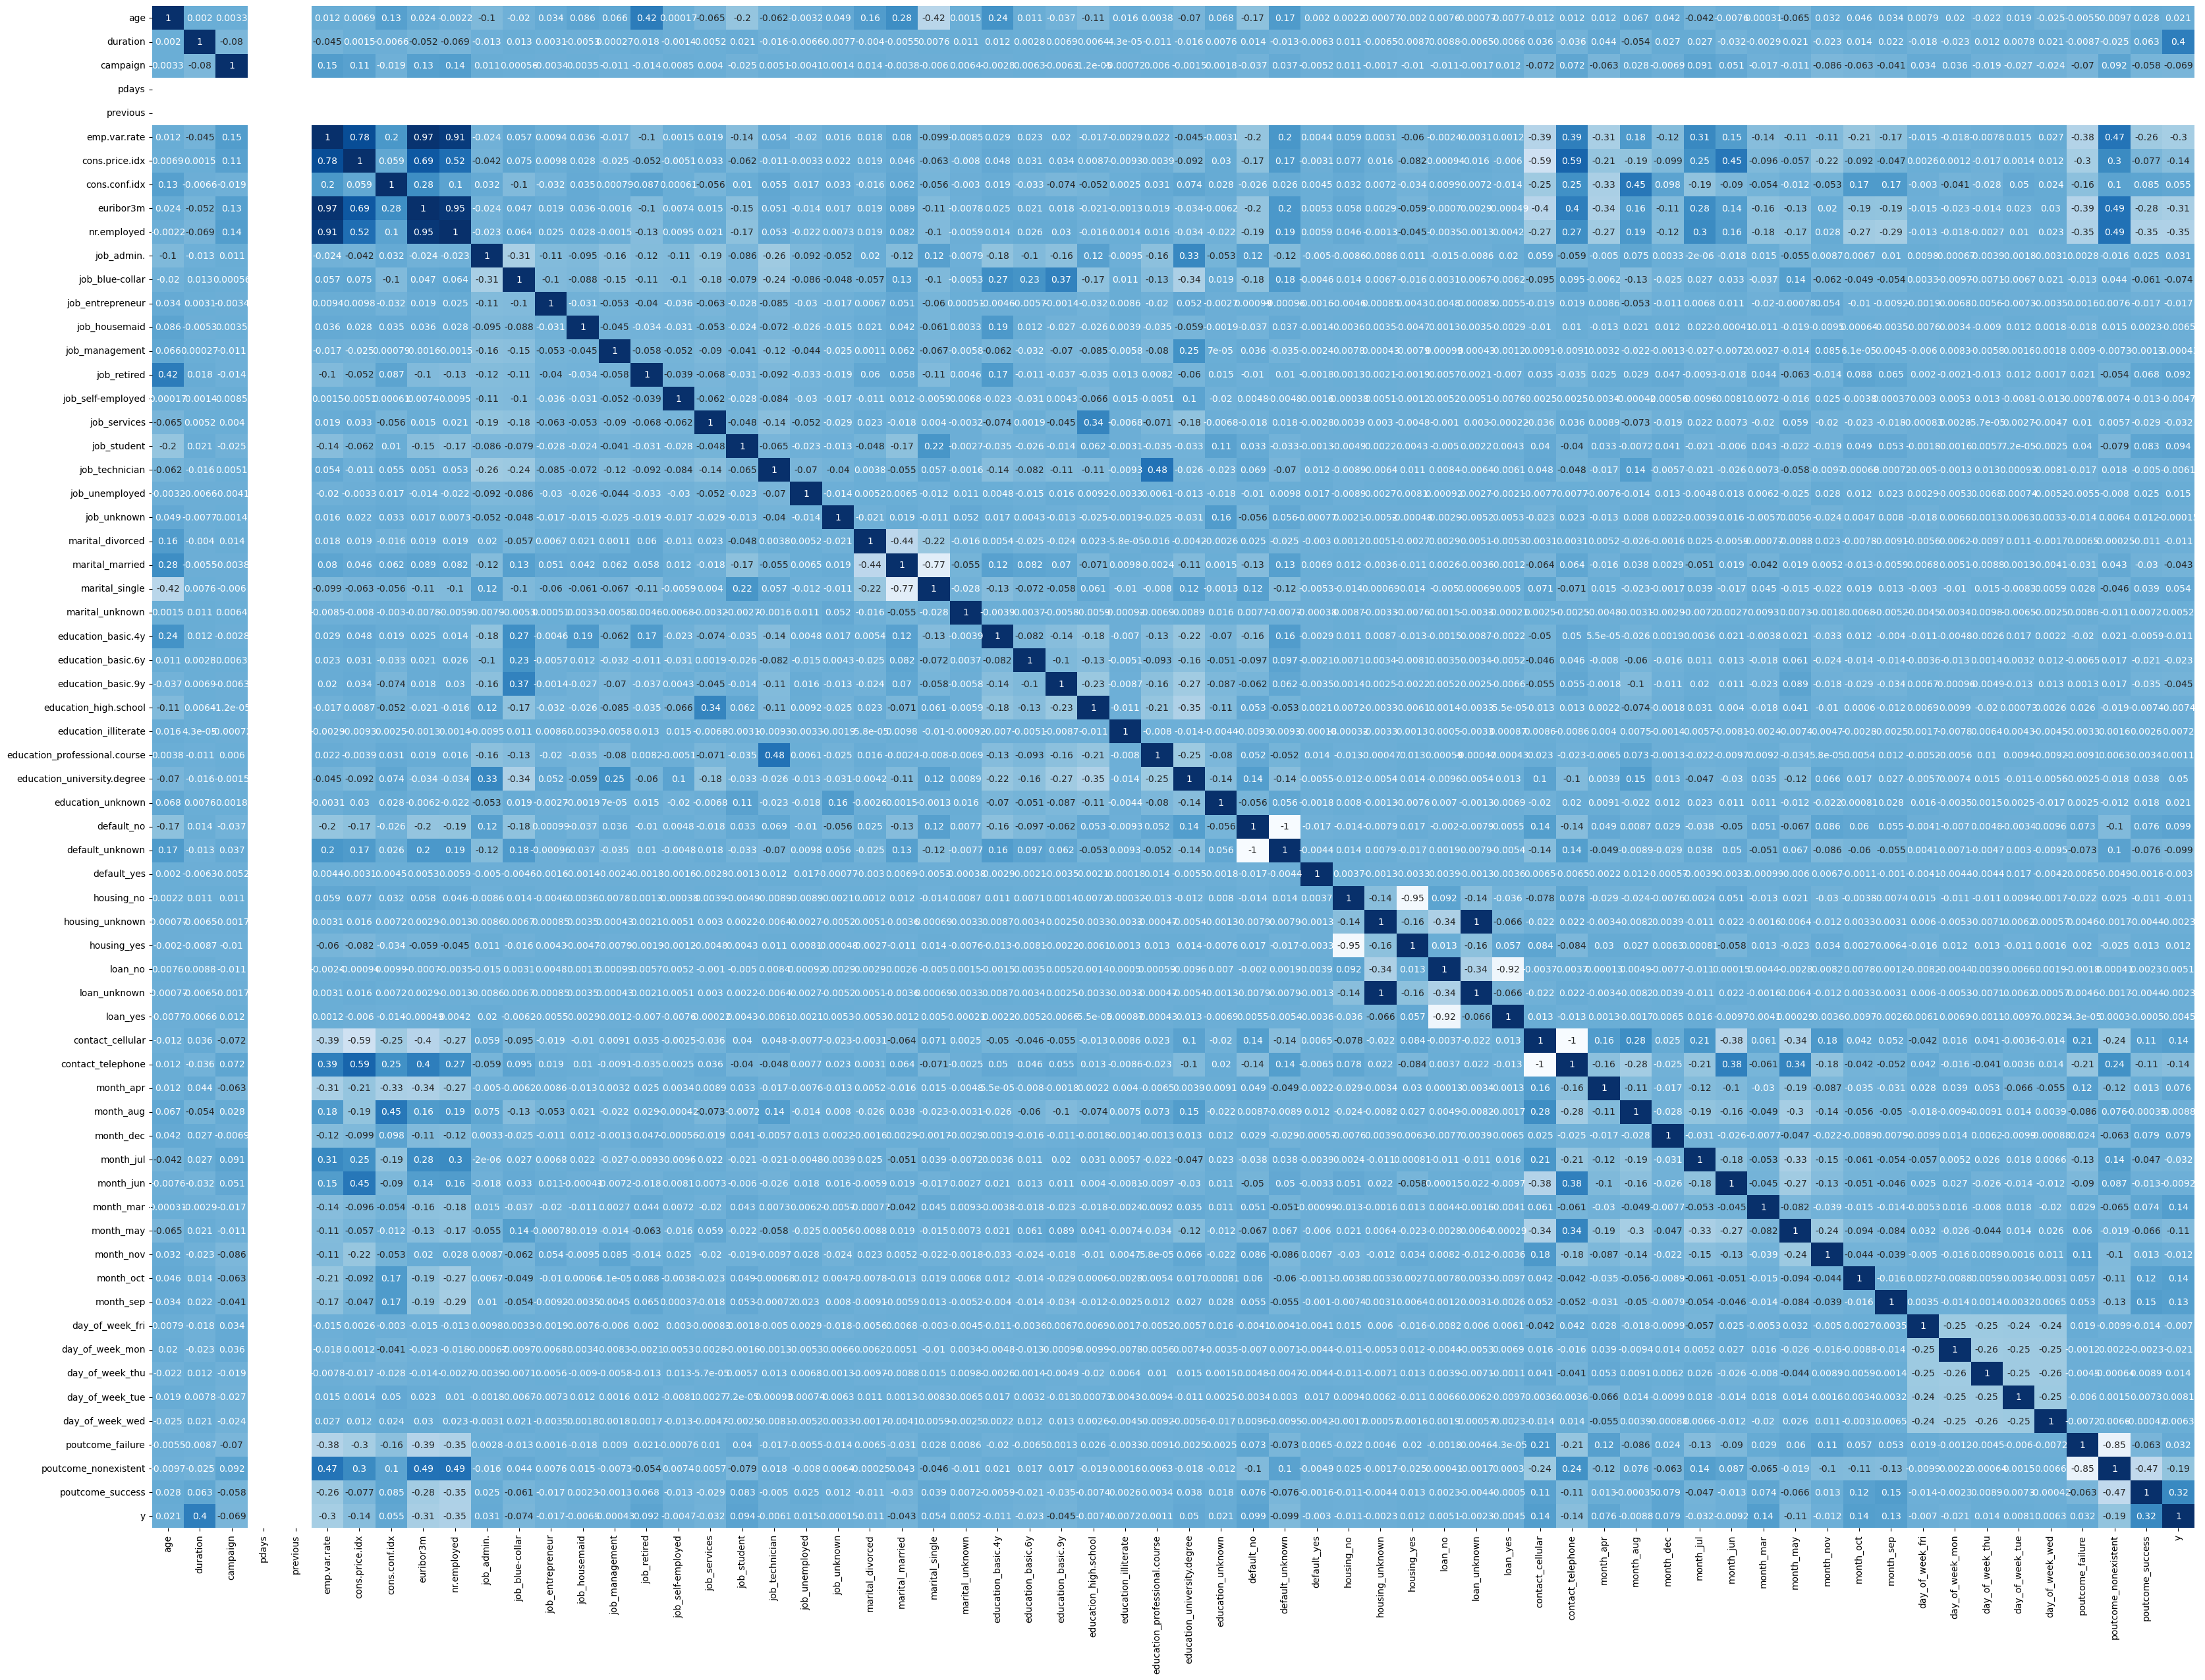

In [852]:
data2=X.copy()
data2['y']=y.copy()
plt.figure(figsize=(40,30))
sns.heatmap(data2.corr(),cbar=False,cmap='Blues',annot=True)
data2.corr()

In [853]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,shuffle=True,random_state=44)
print('X_train shape',X_train.shape)
print('X_test shape',X_test.shape)
print('y_train shape',y_train.shape)
print('y_test shape',y_test.shape)

X_train shape (32940, 63)
X_test shape (8236, 63)
y_train shape (32940,)
y_test shape (8236,)


In [854]:
X_test,X_val,y_test,y_val=train_test_split(X_test,y_test,test_size=.25,shuffle=True,random_state=44)
print('X_test shape',X_test.shape)
print('X_val shape',X_val.shape)
print('y_test shape',y_test.shape)
print('y_val shape',y_val.shape)

X_test shape (6177, 63)
X_val shape (2059, 63)
y_test shape (6177,)
y_val shape (2059,)


In [855]:
model=keras.models.Sequential()
model.add(keras.layers.Dense(128,input_shape=(X.shape[1],),activation='relu',name='Dense_Layer1'))
model.add(keras.layers.Dense(256,activation='relu',name='Dense_Layer2'))
model.add(keras.layers.Dense(1,activation='sigmoid',name='Dense_Layer3'))

In [856]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_Layer1 (Dense)        (None, 128)               8192      
                                                                 
 Dense_Layer2 (Dense)        (None, 256)               33024     
                                                                 
 Dense_Layer3 (Dense)        (None, 1)                 257       
                                                                 
Total params: 41,473
Trainable params: 41,473
Non-trainable params: 0
_________________________________________________________________


In [857]:
model.compile(optimizer ='adam',loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb =keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
early_stopping_cb =keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
hist=model.fit(X_train, y_train, epochs=30,validation_data=(X_val,y_val),batch_size=64,
         callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/30
515/515 [==============================] - 3s 3ms/step - loss: 5.4825 - accuracy: 0.8362 - val_loss: 14.3296 - val_accuracy: 0.8805
Epoch 2/30
515/515 [==============================] - 1s 2ms/step - loss: 3.0845 - accuracy: 0.8495 - val_loss: 0.9867 - val_accuracy: 0.8786
Epoch 3/30
515/515 [==============================] - 1s 2ms/step - loss: 1.6255 - accuracy: 0.8588 - val_loss: 1.4530 - val_accuracy: 0.8791
Epoch 4/30
515/515 [==============================] - 1s 2ms/step - loss: 1.2768 - accuracy: 0.8622 - val_loss: 2.4990 - val_accuracy: 0.6299
Epoch 5/30
515/515 [==============================] - 1s 2ms/step - loss: 1.2553 - accuracy: 0.8671 - val_loss: 0.4107 - val_accuracy: 0.9048
Epoch 6/30
515/515 [==============================] - 1s 2ms/step - loss: 0.8290 - accuracy: 0.8738 - val_loss: 0.5823 - val_accuracy: 0.8465
Epoch 7/30
515/515 [==============================] - 1s 2ms/step - loss: 0.8144 - accuracy: 0.8710 - val_loss: 0.5178 - val_accuracy: 0.8922
Epoch

In [858]:
loss,acc=model.evaluate(X_test,y_test)
print('Test Loss :',loss)
print('Test accuracy :',acc)

194/194 [==============================] - 0s 2ms/step - loss: 0.1858 - accuracy: 0.9074
Test Loss : 0.18575331568717957
Test accuracy : 0.9073984026908875


In [859]:
hist_=pd.DataFrame(hist.history)
hist_

loss  accuracy   val_loss  val_accuracy
0   5.482494  0.836157  14.329563      0.880525
1   3.084479  0.849514   0.986693      0.878582
2   1.625475  0.858804   1.452988      0.879067
3   1.276823  0.862234   2.499040      0.629917
4   1.255290  0.867061   0.410697      0.904808
5   0.829002  0.873801   0.582285      0.846527
6   0.814450  0.871038   0.517800      0.892181
7   0.663978  0.874135   1.495598      0.880525
8   0.601953  0.876078   0.311780      0.898494
9   0.402311  0.884335   0.254804      0.895580
10  0.454533  0.882453   0.256564      0.891209
11  0.363155  0.885641   0.346554      0.883924
12  0.361869  0.884123   0.214168      0.901894
13  0.323491  0.883728   0.595951      0.762506
14  0.298016  0.886126   0.448223      0.880525
15  0.296484  0.889526   0.350859      0.882467
16  0.281723  0.888889   0.218722      0.897037
17  0.274453  0.889618   0.255128      0.890238
18  0.246507  0.892502   0.256034      0.894609
19  0.238584  0.893746   0.200578      0.901894
20  0.242421  0.894596   0.223293      0.901894
21  0.236730  0.895689   0.222936      0.888295
22  0.210251  0.898482   0.218255      0.896066
23  0.214998  0.899575   0.217707      0.898494
24  0.221573  0.897146   0.199120      0.903351
25  0.215050  0.898209   0.197309      0.905294
26  0.207787  0.898968   0.202580      0.902865
27  0.212738  0.897420   0.199959      0.906265
28  0.204213  0.899970   0.244177      0.881496
29  0.203042  0.901821   0.200385      0.901408

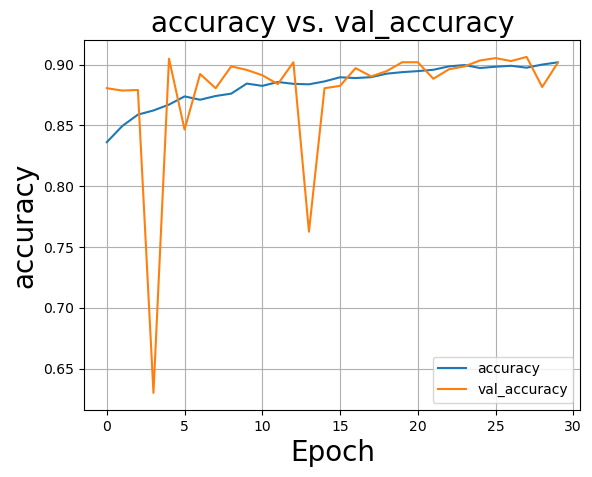

In [860]:
plt.plot(hist_['accuracy'],label='accuracy')
plt.plot(hist_['val_accuracy'],label='val_accuracy')
plt.grid(True)
plt.ylabel('accuracy',fontsize=20)
plt.xlabel('Epoch',fontsize=20)
plt.title('accuracy vs. val_accuracy',fontsize=20)
plt.legend()
plt.show()

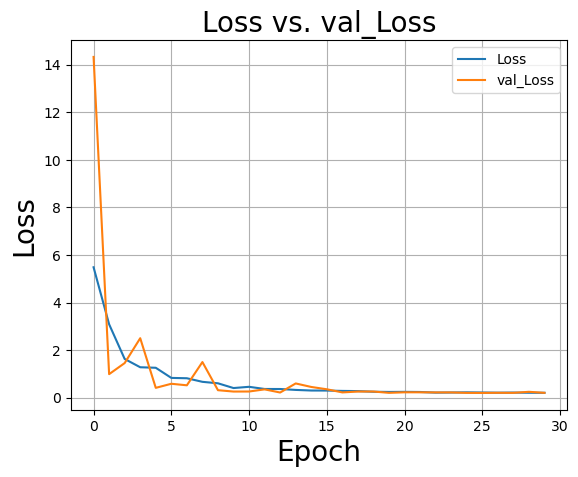

In [861]:
plt.plot(hist_['loss'],label='Loss')
plt.plot(hist_['val_loss'],label='val_Loss')
plt.grid(True)
plt.ylabel('Loss',fontsize=20)
plt.xlabel('Epoch',fontsize=20)
plt.title('Loss vs. val_Loss',fontsize=20)
plt.legend()
plt.show()

In [862]:
pred=model.predict(X_test)
y_pred=np.where(pred>=.5,1,0)

194/194 [==============================] - 0s 946us/step


In [863]:
df=pd.DataFrame()
df['Actual'],df['Predicted']=y_test,y_pred
df

Actual  Predicted
4568        0          0
26438       0          0
7691        0          0
31603       0          0
4704        0          0
...       ...        ...
26737       0          0
9997        0          0
34177       0          0
35205       0          0
12301       0          0

[6177 rows x 2 columns]

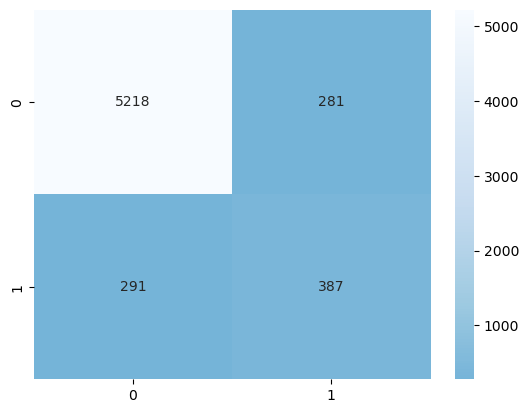

array([[5218,  281],
       [ 291,  387]], dtype=int64)

In [864]:
CM = confusion_matrix(y_test, y_pred)
sns.heatmap(CM,annot=True,fmt='g',center = True,cmap='Blues_r')
plt.show()
CM

In [865]:
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

           0       0.95      0.95      0.95      5499
           1       0.58      0.57      0.58       678

    accuracy                           0.91      6177
   macro avg       0.76      0.76      0.76      6177
weighted avg       0.91      0.91      0.91      6177



The Dataset imblanced

In [866]:
#over
over=RandomOverSampler(random_state=44)
X_train_over, y_train_over = over.fit_resample(X_train, y_train)
y_train_over.value_counts()

0    29225
1    29225
Name: y, dtype: int64

In [867]:
model.compile(optimizer ='adam',loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb =keras.callbacks.ModelCheckpoint("my_keras_model_over.h5", save_best_only=True)
early_stopping_cb =keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
hist=model.fit(X_train_over, y_train_over, epochs=30,validation_data=(X_val,y_val),batch_size=64,
         callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/30
914/914 [==============================] - 2s 2ms/step - loss: 0.3212 - accuracy: 0.8731 - val_loss: 0.3720 - val_accuracy: 0.8261
Epoch 2/30
914/914 [==============================] - 1s 2ms/step - loss: 0.3173 - accuracy: 0.8746 - val_loss: 0.4829 - val_accuracy: 0.7746
Epoch 3/30
914/914 [==============================] - 1s 2ms/step - loss: 0.3127 - accuracy: 0.8759 - val_loss: 0.4824 - val_accuracy: 0.7810
Epoch 4/30
914/914 [==============================] - 1s 2ms/step - loss: 0.3100 - accuracy: 0.8781 - val_loss: 0.2614 - val_accuracy: 0.8708
Epoch 5/30
914/914 [==============================] - 1s 2ms/step - loss: 0.3097 - accuracy: 0.8769 - val_loss: 0.2808 - val_accuracy: 0.8660
Epoch 6/30
914/914 [==============================] - 1s 2ms/step - loss: 0.3084 - accuracy: 0.8764 - val_loss: 0.5740 - val_accuracy: 0.7086
Epoch 7/30
914/914 [==============================] - 1s 2ms/step - loss: 0.3088 - accuracy: 0.8762 - val_loss: 0.3647 - val_accuracy: 0.8271
Epoch 

In [868]:
loss,acc=model.evaluate(X_test,y_test)
print('Test Loss :',loss)
print('Test accuracy :',acc)

194/194 [==============================] - 0s 1ms/step - loss: 0.2400 - accuracy: 0.8794
Test Loss : 0.23998665809631348
Test accuracy : 0.8793913125991821


In [869]:
hist_=pd.DataFrame(hist.history)
hist_

loss  accuracy  val_loss  val_accuracy
0   0.321177  0.873122  0.372029      0.826129
1   0.317326  0.874577  0.482892      0.774648
2   0.312702  0.875877  0.482376      0.780962
3   0.309976  0.878101  0.261397      0.870811
4   0.309677  0.876852  0.280762      0.865954
5   0.308442  0.876424  0.573959      0.708596
6   0.308848  0.876219  0.364658      0.827101
7   0.306445  0.877417  0.488052      0.769791
8   0.303412  0.877879  0.344007      0.830015
9   0.302170  0.879179  0.318146      0.847499
10  0.301455  0.878477  0.401116      0.814473
11  0.300823  0.880068  0.543560      0.743565
12  0.299977  0.880017  0.382542      0.812045
13  0.299047  0.880565  0.372310      0.819815

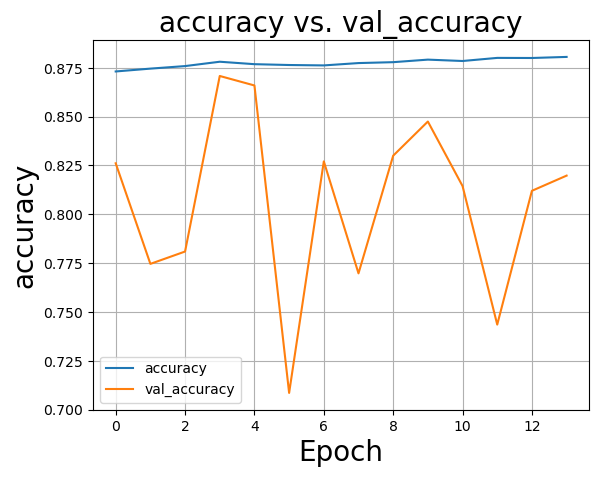

In [870]:
plt.plot(hist_['accuracy'],label='accuracy')
plt.plot(hist_['val_accuracy'],label='val_accuracy')
plt.grid(True)
plt.ylabel('accuracy',fontsize=20)
plt.xlabel('Epoch',fontsize=20)
plt.title('accuracy vs. val_accuracy',fontsize=20)
plt.legend()
plt.show()

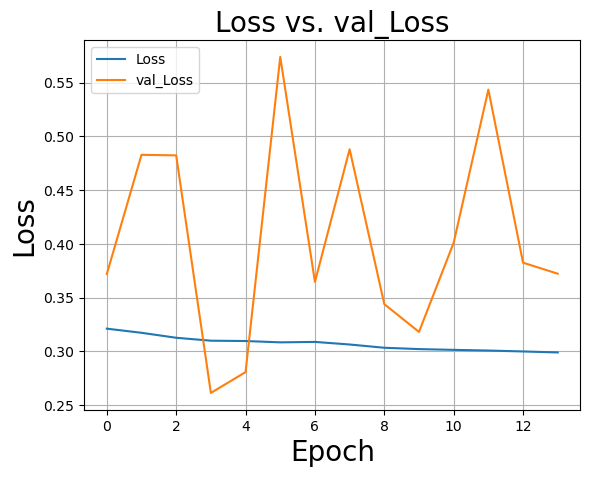

In [871]:
plt.plot(hist_['loss'],label='Loss')
plt.plot(hist_['val_loss'],label='val_Loss')
plt.grid(True)
plt.ylabel('Loss',fontsize=20)
plt.xlabel('Epoch',fontsize=20)
plt.title('Loss vs. val_Loss',fontsize=20)
plt.legend()
plt.show()

In [872]:
pred=model.predict(X_test)
y_pred=np.where(pred>=.5,1,0)

194/194 [==============================] - 0s 897us/step


In [873]:
df=pd.DataFrame()
df['Actual'],df['Predicted']=y_test,y_pred
df

Actual  Predicted
4568        0          1
26438       0          0
7691        0          0
31603       0          0
4704        0          0
...       ...        ...
26737       0          0
9997        0          0
34177       0          0
35205       0          0
12301       0          0

[6177 rows x 2 columns]

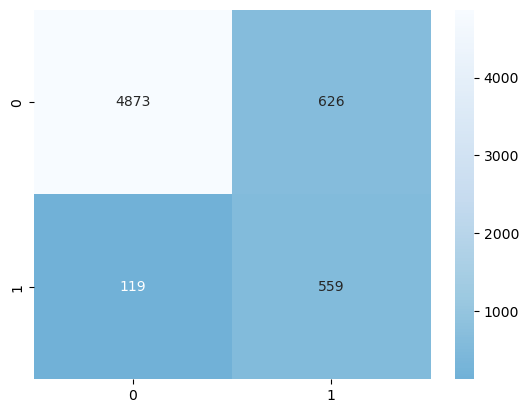

array([[4873,  626],
       [ 119,  559]], dtype=int64)

In [874]:
CM = confusion_matrix(y_test, y_pred)
sns.heatmap(CM,annot=True,fmt='g',center = True,cmap='Blues_r')
plt.show()
CM

In [875]:
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

           0       0.98      0.89      0.93      5499
           1       0.47      0.82      0.60       678

    accuracy                           0.88      6177
   macro avg       0.72      0.86      0.76      6177
weighted avg       0.92      0.88      0.89      6177



In [876]:
#under
under=RandomUnderSampler(random_state=44)
X_train_under, y_train_under = under.fit_resample(X_train, y_train)
y_train_under.value_counts()

0    3715
1    3715
Name: y, dtype: int64

In [877]:
model.compile(optimizer ='adam',loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb =keras.callbacks.ModelCheckpoint("my_keras_model_under.h5", save_best_only=True)
early_stopping_cb =keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
hist=model.fit(X_train_under, y_train_under, epochs=30,validation_data=(X_val,y_val),batch_size=64,
         callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/30
117/117 [==============================] - 1s 5ms/step - loss: 0.3120 - accuracy: 0.8769 - val_loss: 0.3361 - val_accuracy: 0.8281
Epoch 2/30
117/117 [==============================] - 0s 2ms/step - loss: 0.3052 - accuracy: 0.8786 - val_loss: 0.3518 - val_accuracy: 0.8300
Epoch 3/30
117/117 [==============================] - 0s 2ms/step - loss: 0.3129 - accuracy: 0.8774 - val_loss: 0.5141 - val_accuracy: 0.7557
Epoch 4/30
117/117 [==============================] - 0s 3ms/step - loss: 0.3070 - accuracy: 0.8805 - val_loss: 0.2581 - val_accuracy: 0.8718
Epoch 5/30
117/117 [==============================] - 0s 2ms/step - loss: 0.3157 - accuracy: 0.8750 - val_loss: 0.4003 - val_accuracy: 0.7936
Epoch 6/30
117/117 [==============================] - 0s 2ms/step - loss: 0.3124 - accuracy: 0.8779 - val_loss: 0.2814 - val_accuracy: 0.8694
Epoch 7/30
117/117 [==============================] - 0s 2ms/step - loss: 0.3098 - accuracy: 0.8803 - val_loss: 0.3943 - val_accuracy: 0.8072
Epoch 

In [878]:
loss,acc=model.evaluate(X_test,y_test)
print('Test Loss :',loss)
print('Test accuracy :',acc)

194/194 [==============================] - 0s 1ms/step - loss: 0.2404 - accuracy: 0.8810
Test Loss : 0.24035052955150604
Test accuracy : 0.8810101747512817


In [879]:
hist_=pd.DataFrame(hist.history)
hist_

loss  accuracy  val_loss  val_accuracy
0   0.312020  0.876851  0.336129      0.828072
1   0.305154  0.878600  0.351836      0.830015
2   0.312878  0.877389  0.514107      0.755707
3   0.307029  0.880485  0.258128      0.871782
4   0.315683  0.874966  0.400328      0.793589
5   0.312449  0.877927  0.281377      0.869354
6   0.309781  0.880350  0.394318      0.807188
7   0.304465  0.878331  0.433088      0.795046
8   0.311109  0.875908  0.280560      0.860126
9   0.303449  0.881965  0.328259      0.843128
10  0.313420  0.872678  0.354114      0.827586
11  0.310614  0.876447  0.518010      0.751821
12  0.304952  0.879542  0.495009      0.786790
13  0.312176  0.872948  0.293902      0.851870

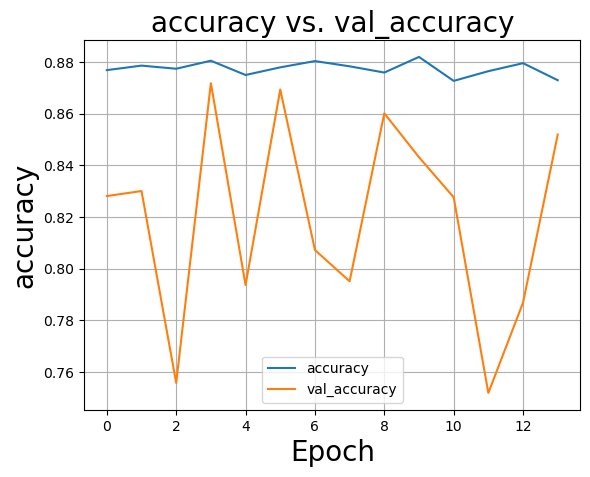

In [880]:
plt.plot(hist_['accuracy'],label='accuracy')
plt.plot(hist_['val_accuracy'],label='val_accuracy')
plt.grid(True)
plt.ylabel('accuracy',fontsize=20)
plt.xlabel('Epoch',fontsize=20)
plt.title('accuracy vs. val_accuracy',fontsize=20)
plt.legend()
plt.show()

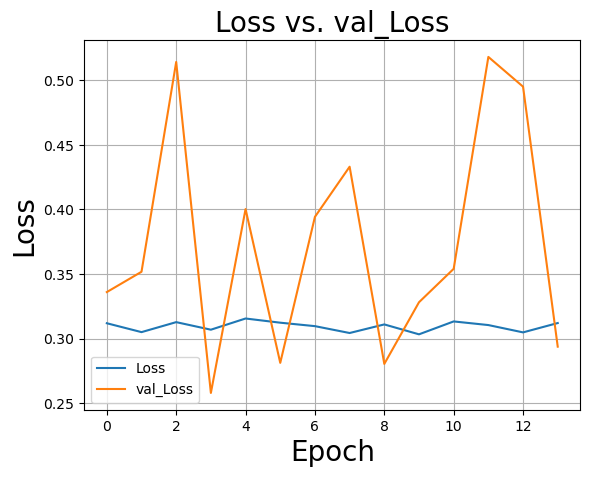

In [881]:
plt.plot(hist_['loss'],label='Loss')
plt.plot(hist_['val_loss'],label='val_Loss')
plt.grid(True)
plt.ylabel('Loss',fontsize=20)
plt.xlabel('Epoch',fontsize=20)
plt.title('Loss vs. val_Loss',fontsize=20)
plt.legend()
plt.show()

In [882]:
pred=model.predict(X_test)
y_pred=np.where(pred>=.5,1,0)

194/194 [==============================] - 0s 921us/step


In [883]:
df=pd.DataFrame()
df['Actual'],df['Predicted']=y_test,y_pred
df

Actual  Predicted
4568        0          1
26438       0          0
7691        0          0
31603       0          0
4704        0          0
...       ...        ...
26737       0          0
9997        0          0
34177       0          0
35205       0          0
12301       0          0

[6177 rows x 2 columns]

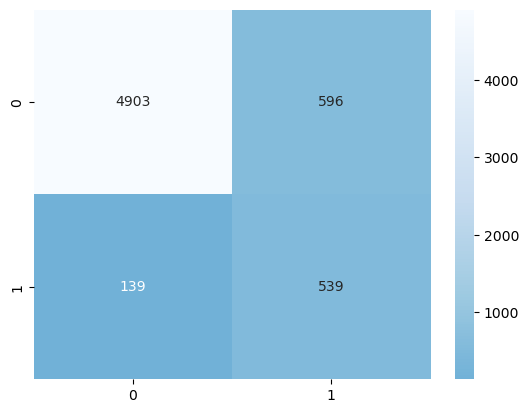

array([[4903,  596],
       [ 139,  539]], dtype=int64)

In [884]:
CM = confusion_matrix(y_test, y_pred)
sns.heatmap(CM,annot=True,fmt='g',center = True,cmap='Blues_r')
plt.show()
CM

In [885]:
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

           0       0.97      0.89      0.93      5499
           1       0.47      0.79      0.59       678

    accuracy                           0.88      6177
   macro avg       0.72      0.84      0.76      6177
weighted avg       0.92      0.88      0.89      6177



Torch

In [886]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer=nn.Sequential(
                                nn.Linear(X_train.shape[1],128),
                                nn.ReLU(),
                                nn.Linear(128,256),
                                nn.ReLU(),
                                nn.Linear(256,1),
                                nn.Sigmoid()
                                )
    def forward(self, x):
        return self.layer(x)

In [887]:
model=NeuralNetwork()

In [888]:
lr=.0001
optimizer=torch.optim.Adam(model.parameters(),lr)

In [889]:
loss_func=nn.MSELoss()
epoch=30

In [890]:
batch_size = 64
train_dataset =torch.utils.data.TensorDataset(torch.from_numpy(X_train.values)
                                              ,torch.from_numpy(y_train.values))
train_loader =torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [891]:
warnings.simplefilter("ignore")
for iter in range(epoch):
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()  
        batch_X = batch_X.float()
        batch_y = batch_y.float()  
        outputs = model(batch_X)  
        loss = loss_func(outputs, batch_y)  
        loss.backward()
        optimizer.step()
    print(f"Epoch [{iter+1}/{epoch}]","\tloss", loss.item())


Epoch [1/30] 	loss 0.20454545319080353
Epoch [2/30] 	loss 0.022727273404598236
Epoch [3/30] 	loss 0.06818182021379471
Epoch [4/30] 	loss 0.04545454680919647
Epoch [5/30] 	loss 0.20454545319080353
Epoch [6/30] 	loss 0.15909090638160706
Epoch [7/30] 	loss 0.09090909361839294
Epoch [8/30] 	loss 0.09090909361839294
Epoch [9/30] 	loss 0.1818181872367859
Epoch [10/30] 	loss 0.15909090638160706
Epoch [11/30] 	loss 0.09090909361839294
Epoch [12/30] 	loss 0.11363636702299118
Epoch [13/30] 	loss 0.09090909361839294
Epoch [14/30] 	loss 0.20454545319080353
Epoch [15/30] 	loss 0.04545454680919647
Epoch [16/30] 	loss 0.1818181872367859
Epoch [17/30] 	loss 0.15909090638160706
Epoch [18/30] 	loss 0.09090909361839294
Epoch [19/30] 	loss 0.13636364042758942
Epoch [20/30] 	loss 0.15909090638160706
Epoch [21/30] 	loss 0.09090909361839294
Epoch [22/30] 	loss 0.13636364042758942
Epoch [23/30] 	loss 0.13636364042758942
Epoch [24/30] 	loss 0.15909090638160706
Epoch [25/30] 	loss 0.11363636702299118
Epoch [26/

In [892]:
pred=model.forward(torch.from_numpy(X_test.values).float())
pred

tensor([[3.3862e-35],
        [5.8000e-34],
        [8.1243e-34],
        ...,
        [4.4623e-34],
        [1.8441e-33],
        [1.0413e-34]], grad_fn=<SigmoidBackward0>)

In [893]:
pred=pred.detach().numpy()
pred

array([[3.3862402e-35],
       [5.8000347e-34],
       [8.1242566e-34],
       ...,
       [4.4622666e-34],
       [1.8441475e-33],
       [1.0413497e-34]], dtype=float32)

In [894]:
y_pred=np.where(pred>=.5,1,0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [895]:
df=pd.DataFrame()
df['Actual'],df['Predicted']=y_test,y_pred
df

Actual  Predicted
4568        0          0
26438       0          0
7691        0          0
31603       0          0
4704        0          0
...       ...        ...
26737       0          0
9997        0          0
34177       0          0
35205       0          0
12301       0          0

[6177 rows x 2 columns]

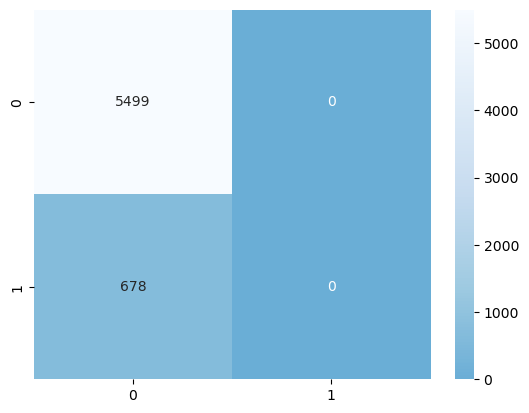

array([[5499,    0],
       [ 678,    0]], dtype=int64)

In [896]:
CM = confusion_matrix(y_test, y_pred)
sns.heatmap(CM,annot=True,fmt='g',center = True,cmap='Blues_r')
plt.show()
CM

In [897]:
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

           0       0.89      1.00      0.94      5499
           1       0.00      0.00      0.00       678

    accuracy                           0.89      6177
   macro avg       0.45      0.50      0.47      6177
weighted avg       0.79      0.89      0.84      6177



In [898]:
#over
batch_size = 64
train_dataset =torch.utils.data.TensorDataset(torch.from_numpy(X_train_over.values)
                                              ,torch.from_numpy(y_train_over.values))
train_loader =torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
warnings.simplefilter("ignore")
for iter in range(epoch):
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()  
        batch_X = batch_X.float()
        batch_y = batch_y.float()  
        outputs = model(batch_X)  
        loss = loss_func(outputs, batch_y)  
        loss.backward()
        optimizer.step()
    print(f"Epoch [{iter+1}/{epoch}]","\tloss", loss.item())

Epoch [1/30] 	loss 0.3333333432674408
Epoch [2/30] 	loss 0.4444444477558136
Epoch [3/30] 	loss 0.5
Epoch [4/30] 	loss 0.4444444477558136
Epoch [5/30] 	loss 0.5555555820465088
Epoch [6/30] 	loss 0.5
Epoch [7/30] 	loss 0.5
Epoch [8/30] 	loss 0.3333333432674408
Epoch [9/30] 	loss 0.5555555820465088
Epoch [10/30] 	loss 0.3333333432674408
Epoch [11/30] 	loss 0.3888888955116272
Epoch [12/30] 	loss 0.6666666865348816
Epoch [13/30] 	loss 0.5555555820465088
Epoch [14/30] 	loss 0.3888888955116272
Epoch [15/30] 	loss 0.5
Epoch [16/30] 	loss 0.5555555820465088
Epoch [17/30] 	loss 0.2222222238779068
Epoch [18/30] 	loss 0.3888888955116272
Epoch [19/30] 	loss 0.3888888955116272
Epoch [20/30] 	loss 0.5
Epoch [21/30] 	loss 0.5555555820465088
Epoch [22/30] 	loss 0.5
Epoch [23/30] 	loss 0.3888888955116272
Epoch [24/30] 	loss 0.7777777910232544
Epoch [25/30] 	loss 0.5
Epoch [26/30] 	loss 0.5555555820465088
Epoch [27/30] 	loss 0.5555555820465088
Epoch [28/30] 	loss 0.5
Epoch [29/30] 	loss 0.444444447755813

In [899]:
pred=model.forward(torch.from_numpy(X_test.values).float())
pred

tensor([[3.3862e-35],
        [5.8000e-34],
        [8.1243e-34],
        ...,
        [4.4623e-34],
        [1.8441e-33],
        [1.0413e-34]], grad_fn=<SigmoidBackward0>)

In [900]:
pred=pred.detach().numpy()
pred

array([[3.3862402e-35],
       [5.8000347e-34],
       [8.1242566e-34],
       ...,
       [4.4622666e-34],
       [1.8441475e-33],
       [1.0413497e-34]], dtype=float32)

In [901]:
y_pred=np.where(pred>=.5,1,0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [902]:
df=pd.DataFrame()
df['Actual'],df['Predicted']=y_test,y_pred
df

Actual  Predicted
4568        0          0
26438       0          0
7691        0          0
31603       0          0
4704        0          0
...       ...        ...
26737       0          0
9997        0          0
34177       0          0
35205       0          0
12301       0          0

[6177 rows x 2 columns]

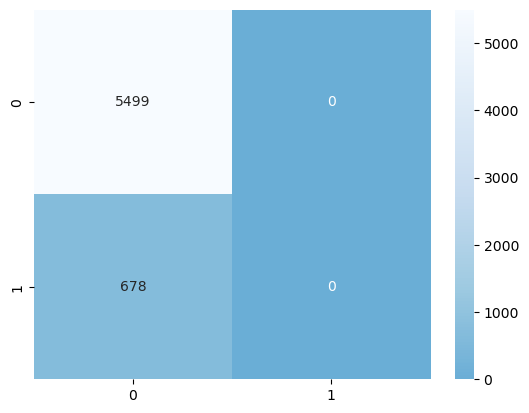

array([[5499,    0],
       [ 678,    0]], dtype=int64)

In [903]:
CM = confusion_matrix(y_test, y_pred)
sns.heatmap(CM,annot=True,fmt='g',center = True,cmap='Blues_r')
plt.show()
CM

In [904]:
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

           0       0.89      1.00      0.94      5499
           1       0.00      0.00      0.00       678

    accuracy                           0.89      6177
   macro avg       0.45      0.50      0.47      6177
weighted avg       0.79      0.89      0.84      6177



In [905]:
#under
batch_size = 64
train_dataset =torch.utils.data.TensorDataset(torch.from_numpy(X_train_under.values)
                                              ,torch.from_numpy(y_train_under.values))
train_loader =torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
warnings.simplefilter("ignore")
for iter in range(epoch):
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()  
        batch_X = batch_X.float()
        batch_y = batch_y.float()  
        outputs = model(batch_X)  
        loss = loss_func(outputs, batch_y)  
        loss.backward()
        optimizer.step()
    print(f"Epoch [{iter+1}/{epoch}]","\tloss", loss.item())

Epoch [1/30] 	loss 0.6666666865348816
Epoch [2/30] 	loss 0.3333333432674408
Epoch [3/30] 	loss 0.5
Epoch [4/30] 	loss 0.6666666865348816
Epoch [5/30] 	loss 0.6666666865348816
Epoch [6/30] 	loss 0.8333333134651184
Epoch [7/30] 	loss 0.6666666865348816
Epoch [8/30] 	loss 0.6666666865348816
Epoch [9/30] 	loss 0.0
Epoch [10/30] 	loss 0.6666666865348816
Epoch [11/30] 	loss 0.5
Epoch [12/30] 	loss 0.5
Epoch [13/30] 	loss 0.3333333432674408
Epoch [14/30] 	loss 0.3333333432674408
Epoch [15/30] 	loss 0.3333333432674408
Epoch [16/30] 	loss 0.5
Epoch [17/30] 	loss 0.0
Epoch [18/30] 	loss 0.3333333432674408
Epoch [19/30] 	loss 0.5
Epoch [20/30] 	loss 0.6666666865348816
Epoch [21/30] 	loss 0.1666666716337204
Epoch [22/30] 	loss 0.5
Epoch [23/30] 	loss 0.8333333134651184
Epoch [24/30] 	loss 0.6666666865348816
Epoch [25/30] 	loss 0.5
Epoch [26/30] 	loss 0.6666666865348816
Epoch [27/30] 	loss 0.8333333134651184
Epoch [28/30] 	loss 0.6666666865348816
Epoch [29/30] 	loss 0.3333333432674408
Epoch [30/30]

In [906]:
pred=model.forward(torch.from_numpy(X_test.values).float())
pred

tensor([[3.3862e-35],
        [5.8000e-34],
        [8.1243e-34],
        ...,
        [4.4623e-34],
        [1.8441e-33],
        [1.0413e-34]], grad_fn=<SigmoidBackward0>)

In [907]:
pred=pred.detach().numpy()
pred

array([[3.3862402e-35],
       [5.8000347e-34],
       [8.1242566e-34],
       ...,
       [4.4622666e-34],
       [1.8441475e-33],
       [1.0413497e-34]], dtype=float32)

In [908]:
y_pred=np.where(pred>=.5,1,0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [909]:
df=pd.DataFrame()
df['Actual'],df['Predicted']=y_test,y_pred
df

Actual  Predicted
4568        0          0
26438       0          0
7691        0          0
31603       0          0
4704        0          0
...       ...        ...
26737       0          0
9997        0          0
34177       0          0
35205       0          0
12301       0          0

[6177 rows x 2 columns]

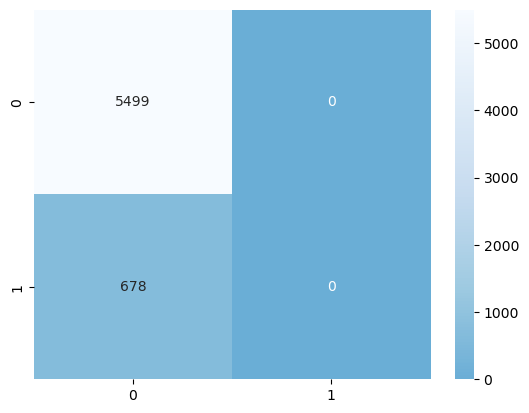

array([[5499,    0],
       [ 678,    0]], dtype=int64)

In [910]:
CM = confusion_matrix(y_test, y_pred)
sns.heatmap(CM,annot=True,fmt='g',center = True,cmap='Blues_r')
plt.show()
CM

In [911]:
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

           0       0.89      1.00      0.94      5499
           1       0.00      0.00      0.00       678

    accuracy                           0.89      6177
   macro avg       0.45      0.50      0.47      6177
weighted avg       0.79      0.89      0.84      6177

